# Importing Libraries

In [263]:
# Library for reading mail and writing to csv
import unicodecsv as csv
import email
from bs4 import BeautifulSoup
from imap_tools import MailBox, AND, A
import re

import os
import numpy as np 
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.pipeline import Pipeline
import pickle
import joblib 


# NLP LIBRARIES
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud
import scrubadub as sb
#from nltk.stem.porter import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from nltk.stem import WordNetLemmatizer


# downloading stopwords corpus
nltk.download('stopwords')
#nltk.download('wordnet')
#stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline


#pip install xgboost
#!pip install spacy

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mansurya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [264]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers


In [265]:
#pip install imbalanced-learn!
#!pip install delayed 

In [266]:
# import imblearn
# from imblearn import under_sampling, over_sampling
# from imblearn.over_sampling import SMOTE

In [267]:
os.getcwd()

'E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Code'

# Reading First time & Forward mail

In [268]:
inbox_AHAM = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_AHAM.csv",encoding="utf-8")
print("inbox_AHAM",len(inbox_AHAM))

inbox_ATTENDANCE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_ATTENDANCE.csv",encoding="utf-8")
print("inbox_ATTENDANCE",len(inbox_ATTENDANCE))

inbox_AUS_VISA = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_AUS VISA.csv",encoding="utf-8")
print("inbox_AUS_VISA",len(inbox_AUS_VISA))

inbox_CENTOR = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_CENTOR.csv",encoding="utf-8")
print("inbox_CENTOR",len(inbox_CENTOR))

inbox_CLAIMS_REIMBURSEMENTS = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_CLAIMS REIMBURSEMENTS.csv",encoding="utf-8")
print("inbox_CLAIMS_REIMBURSEMENTS",len(inbox_CLAIMS_REIMBURSEMENTS))

inbox_DOCUMENTS_LETTERS = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_DOCUMENTS&LETTERS.csv",encoding="utf-8")
print("inbox_DOCUMENTS_LETTERS",len(inbox_DOCUMENTS_LETTERS))

inbox_EMPLOYEE_DATA = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_EMPLOYEE DATA.csv",encoding="utf-8")
print("inbox_EMPLOYEE_DATA",len(inbox_EMPLOYEE_DATA))

inbox_HRD = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_HRD.csv",encoding="utf-8")
print("inbox_HRD",len(inbox_HRD))

inbox_INCREMENTS = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_INCREMENTS.csv",encoding="utf-8")
print("inbox_INCREMENTS",len(inbox_INCREMENTS))

inbox_INDUCTION = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_INDUCTION.csv",encoding="utf-8")
print("inbox_INDUCTION",len(inbox_INDUCTION))

inbox_INFRA = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_INFRA.csv",encoding="utf-8")
print("inbox_INFRA",len(inbox_INFRA))

inbox_INSURANCE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_INSURANCE.csv",encoding="utf-8")
print("inbox_INSURANCE",len(inbox_INSURANCE))

inbox_INVOICES = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_INVOICES.csv",encoding="utf-8")
print("inbox_INVOICES",len(inbox_INVOICES))

inbox_IT_ONBOARDING_FORM = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_IT ONBOARDING FORM.csv",encoding="utf-8")
print("inbox_IT_ONBOARDING_FORM",len(inbox_IT_ONBOARDING_FORM))

inbox_LEAVE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_LEAVE.csv",encoding="utf-8")
print("inbox_LEAVE",len(inbox_LEAVE))

inbox_OTHERS = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_OTHERS.csv",encoding="utf-8")
print("inbox_OTHERS",len(inbox_OTHERS))

inbox_OVERDUE_RECEIVABLES = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_OVERDUE-RECEIVABLES.csv",encoding="utf-8")
print("inbox_OVERDUE_RECEIVABLES",len(inbox_OVERDUE_RECEIVABLES))

inbox_PROJECTS = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_PROJECTS.csv",encoding="utf-8")
print("inbox_PROJECTS",len(inbox_PROJECTS))

inbox_RECRUITMENT = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_RECRUITMENT.csv",encoding="utf-8")
print("inbox_RECRUITMENT",len(inbox_RECRUITMENT))

inbox_RESIGNATION = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_RESIGNATION.csv",encoding="utf-8")
print("inbox_RESIGNATION",len(inbox_RESIGNATION))

inbox_REWARDS_RECOGNITION = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_REWARDS_RECOGNITION.csv",encoding="utf-8")
print("inbox_REWARDS_RECOGNITION",len(inbox_REWARDS_RECOGNITION))

inbox_RSU = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_RSU.csv",encoding="utf-8")
print("inbox_RSU",len(inbox_RSU))

inbox_SALARY = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_SALARY.csv",encoding="utf-8")
print("inbox_SALARY",len(inbox_SALARY))

inbox_TRAINING_DEVELOPMENT = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_TRAINING_DEVELOPMENT.csv",encoding="utf-8")
print("inbox_TRAINING_DEVELOPMENT",len(inbox_TRAINING_DEVELOPMENT))

inbox_UTILIZATION = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data\\inbox_UTILIZATION.csv",encoding="utf-8")
print("inbox_UTILIZATION",len(inbox_UTILIZATION))



inbox_AHAM 1
inbox_ATTENDANCE 20
inbox_AUS_VISA 5
inbox_CENTOR 10
inbox_CLAIMS_REIMBURSEMENTS 109
inbox_DOCUMENTS_LETTERS 1
inbox_EMPLOYEE_DATA 21
inbox_HRD 3
inbox_INCREMENTS 21
inbox_INDUCTION 5
inbox_INFRA 10
inbox_INSURANCE 3
inbox_INVOICES 3
inbox_IT_ONBOARDING_FORM 38
inbox_LEAVE 12
inbox_OTHERS 11
inbox_OVERDUE_RECEIVABLES 0
inbox_PROJECTS 8
inbox_RECRUITMENT 286
inbox_RESIGNATION 1
inbox_REWARDS_RECOGNITION 2
inbox_RSU 5
inbox_SALARY 7
inbox_TRAINING_DEVELOPMENT 1
inbox_UTILIZATION 1


# Reading Reply mails

In [269]:
inbox_AHAM_RE = pandas.read_csv(r"E:\EmailTriage\EmailTriage_C_Operatn_5-5-21\Data_reply\inbox_AHAM_RE.csv",encoding="utf-8")
inbox_AHAM_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_AHAM",len(inbox_AHAM_RE))

inbox_ATTENDANCE_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_ATTENDANCE_RE.csv",encoding="utf-8")
inbox_ATTENDANCE_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_ATTENDANCE",len(inbox_ATTENDANCE_RE))

inbox_AUS_VISA_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_AUS_VISA_RE.csv",encoding="utf-8")
inbox_AUS_VISA_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_AUS_VISA",len(inbox_AUS_VISA_RE))

inbox_CENTOR_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_CENTOR_RE.csv",encoding="utf-8")
inbox_CENTOR_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_CENTOR",len(inbox_CENTOR_RE))

inbox_CLAIMS_REIMBURSEMENTS_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_CLAIMS_REIMBURSEMENTS_RE.csv",encoding="utf-8")
inbox_CLAIMS_REIMBURSEMENTS_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_CLAIMS_REIMBURSEMENTS",len(inbox_CLAIMS_REIMBURSEMENTS_RE))

inbox_DOCUMENTS_LETTERS_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_DOCUMENTS_LETTERS_RE.csv",encoding="utf-8")
inbox_DOCUMENTS_LETTERS_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_DOCUMENTS_LETTERS",len(inbox_DOCUMENTS_LETTERS_RE))

inbox_EMPLOYEE_DATA_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_EMPLOYEE_DATA_RE.csv",encoding="utf-8")
inbox_EMPLOYEE_DATA_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_EMPLOYEE_DATA",len(inbox_EMPLOYEE_DATA_RE))

inbox_HRD_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_HRD_RE.csv",encoding="utf-8")
inbox_HRD_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_HRD",len(inbox_HRD_RE))

inbox_INCREMENTS_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_INCREMENTS_RE.csv",encoding="utf-8")
inbox_INCREMENTS_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_INCREMENTS",len(inbox_INCREMENTS_RE))

inbox_INDUCTION_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_INDUCTION_RE.csv",encoding="utf-8")
inbox_INDUCTION_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_INDUCTION",len(inbox_INDUCTION_RE))

inbox_INFRA_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_INFRA_RE.csv",encoding="utf-8")
inbox_INFRA_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_INFRA",len(inbox_INFRA_RE))

inbox_INSURANCE_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_INSURANCE_RE.csv",encoding="utf-8")
inbox_INSURANCE_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_INSURANCE",len(inbox_INSURANCE_RE))

inbox_INVOICES_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_INVOICES_RE.csv",encoding="utf-8")
inbox_INVOICES_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_INVOICES",len(inbox_INVOICES_RE))

inbox_IT_ONBOARDING_FORM_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_IT_ONBOARDING_FORM_RE.csv",encoding="utf-8")
inbox_IT_ONBOARDING_FORM_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_IT_ONBOARDING_FORM",len(inbox_IT_ONBOARDING_FORM_RE))

inbox_LEAVE_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_LEAVE_RE.csv",encoding="utf-8")
inbox_LEAVE_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_LEAVE",len(inbox_LEAVE_RE))

inbox_OTHERS_RE = pandas.read_csv(r"E://EmailTriage//EmailTriage_C_Operatn_5-5-21//Data_reply/inbox_OTHERS_RE.csv",encoding="utf-8")
inbox_OTHERS_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_OTHERS",len(inbox_OTHERS_RE))

inbox_OVERDUE_RECEIVABLES_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_OVERDUE_RECEIVABLES_RE.csv",encoding="utf-8")
inbox_OVERDUE_RECEIVABLES_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_OVERDUE_RECEIVABLES",len(inbox_OVERDUE_RECEIVABLES_RE))

inbox_PROJECTS_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_PROJECTS_RE.csv",encoding="utf-8")
inbox_PROJECTS_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_PROJECTS",len(inbox_PROJECTS_RE))

inbox_RECRUITMENT_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_RECRUITMENT_RE.csv",encoding="utf-8")
inbox_RECRUITMENT_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_RECRUITMENT",len(inbox_RECRUITMENT_RE))

inbox_RESIGNATION_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_RESIGNATION_RE.csv",encoding="utf-8")
inbox_RESIGNATION_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_RESIGNATION",len(inbox_RESIGNATION_RE))

inbox_REWARDS_RECOGNITION_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_REWARDS_RECOGNITION_RE.csv",encoding="utf-8")
inbox_REWARDS_RECOGNITION_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_REWARDS_RECOGNITION",len(inbox_REWARDS_RECOGNITION_RE))

inbox_RSU_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_RSU_RE.csv",encoding="utf-8")
inbox_RSU_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_RSU",len(inbox_RSU_RE))

inbox_SALARY_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_SALARY_RE.csv",encoding="utf-8")
inbox_SALARY_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_SALARY",len(inbox_SALARY_RE))

inbox_TRAINING_DEVELOPMENT_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_TRAINING_DEVELOPMENT_RE.csv",encoding="utf-8")
inbox_TRAINING_DEVELOPMENT_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_TRAINING_DEVELOPMENT",len(inbox_TRAINING_DEVELOPMENT_RE))

inbox_UTILIZATION_RE = pandas.read_csv(r"E:\\EmailTriage\\EmailTriage_C_Operatn_5-5-21\\Data_reply\\inbox_UTILIZATION_RE.csv",encoding="utf-8")
inbox_UTILIZATION_RE.drop_duplicates(subset=['email'], keep="first",inplace = True)
print("inbox_UTILIZATION",len(inbox_UTILIZATION_RE))



inbox_AHAM 3
inbox_ATTENDANCE 155
inbox_AUS_VISA 18
inbox_CENTOR 18
inbox_CLAIMS_REIMBURSEMENTS 51
inbox_DOCUMENTS_LETTERS 5
inbox_EMPLOYEE_DATA 77
inbox_HRD 8
inbox_INCREMENTS 6
inbox_INDUCTION 8
inbox_INFRA 63
inbox_INSURANCE 7
inbox_INVOICES 11
inbox_IT_ONBOARDING_FORM 9
inbox_LEAVE 16
inbox_OTHERS 22
inbox_OVERDUE_RECEIVABLES 4
inbox_PROJECTS 17
inbox_RECRUITMENT 307
inbox_RESIGNATION 8
inbox_REWARDS_RECOGNITION 28
inbox_RSU 14
inbox_SALARY 19
inbox_TRAINING_DEVELOPMENT 4
inbox_UTILIZATION 9


In [270]:
inbox_RECRUITMENT_FIRST_RE = pandas.concat([inbox_RECRUITMENT,inbox_RECRUITMENT_RE],axis=0)

inbox_RECRUITMENT_FIRST_RE = inbox_RECRUITMENT_FIRST_RE.sample(frac=1).reset_index(drop=True)
inbox_RECRUITMENT_FIRST_RE.isna().sum()
inbox_RECRUITMENT_FIRST_RE = inbox_RECRUITMENT_FIRST_RE.replace(['RTT'],'NAR')
inbox_RECRUITMENT_FIRST_RE

,email,category
0,"Dear Rijo, Greetings !!! Please find attached ...",NAR
1,"\nI accept the offer.\nOn Wed, Mar 24, 2021, 9...",NAR
2,"Dear Angela, On behalf of Centelon, we are del...",NAR
3,"\nhi,\nSorry, recalling this mail as this mai...",NAR
4,"\nHi Team,\nCan I please get updates on the re...",NAR
...,...,...
588,"Hi Sri,Thanks a lot for warm welcome. Here is ...",NAR
589,"Dear Ravi Kiran, On behalf of Centelon, we are...",NAR
590,CAUTION: This email originated from outside of...,NAR
591,"Hello, I hope you are having a good day, I acc...",NAR


In [271]:
inbox_ATTENDANCE_FIRST_RE = pandas.concat([inbox_ATTENDANCE,inbox_ATTENDANCE_RE],axis=0)

inbox_ATTENDANCE_FIRST_RE = inbox_ATTENDANCE_FIRST_RE.sample(frac=1).reset_index(drop=True)
inbox_ATTENDANCE_FIRST_RE.isna().sum()
#inbox_ATTENDANCE_FIRST_RE = inbox_ATTENDANCE_FIRST_RE.replace(['NAR'],'ATT')
inbox_ATTENDANCE_FIRST_RE

,email,category
0,"\nHi team,\nHere is the attendance for the mon...",NAR
1,"Hi Team,\nPlease find my attendance for April ...",NAR
2,"Hi team\nNo holidays, 15 days billable this mo...",NAR
3,"Hi Ann,\nI have applied for a leave in Origin ...",NAR
4,"Hi , Please find the attendance for Sep20: Hol...",NAR
...,...,...
170,Hi\nType\nNo of days\nDates\nComments\nPublic ...,NAR
171,Oh but of course! Im sorry Anne! As usual you ...,NAR
172,FYI\n,NAR
173,NaN,NAR


In [272]:
inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE = pandas.concat([inbox_CLAIMS_REIMBURSEMENTS,inbox_CLAIMS_REIMBURSEMENTS_RE],axis=0)

inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE = inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE.sample(frac=1).reset_index(drop=True)
inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE.isna().sum()
#inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE = inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE.replace(['NAR'],'CLM')
inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE

,email,category
0,"Hi, Please find attached receipts for the same...",NAR
1,Approved\n,NAR
2,"Hello Team, Please find attached invoice and R...",NAR
3,Submitted 2 reimbursement – both have gone to ...,NAR
4,"Hi Ann, Please find attached the claim against...",NAR
...,...,...
155,"Hello Team, Pls find attached bills and reimbu...",NAR
156,"Hi, The following company expenses were debite...",NAR
157,"Hello Team,\nRequest you to update on below re...",NAR
158,"Afternoon, I am requesting reimbursement for t...",NAR


In [273]:
inbox_EMPLOYEE_DATA_FIRST_RE = pandas.concat([inbox_EMPLOYEE_DATA,inbox_EMPLOYEE_DATA_RE],axis=0)

inbox_EMPLOYEE_DATA_FIRST_RE = inbox_EMPLOYEE_DATA_FIRST_RE.sample(frac=1).reset_index(drop=True)
inbox_EMPLOYEE_DATA_FIRST_RE.isna().sum()
inbox_EMPLOYEE_DATA_FIRST_RE = inbox_EMPLOYEE_DATA_FIRST_RE.replace(['NAR'],'EMP')
inbox_EMPLOYEE_DATA_FIRST_RE

,email,category
0,"\nOn Tue, Apr 20, 2021, 8:49 PM Madhavi Janwad...",EMP
1,Hello Kirti\nWe have a glitch. Please resend.\n,EMP
2,"\nHi Ann,\nGood morning,\nPlease find filled u...",EMP
3,"Sure Pranav,\nBut dont extend it.\n",EMP
4,"Hi Lavanya, Welcome! Request you to share belo...",EMP
...,...,...
93,"\nHi Ann,\nPlease find the information below. ...",EMP
94,"\nHello,\nI have attached the documents that y...",EMP
95,"\nDear Team,\nHere is the google drive link w...",EMP
96,"\nHi Team,\nThanks and very kind of you. Nothi...",EMP


In [274]:
# [inbox_AHAM,inbox_ATTENDANCE,inbox_AUS_VISA ,inbox_CENTOR ,inbox_CLAIMS_REIMBURSEMENTS ,inbox_DOCUMENTS_LETTERS ,
# inbox_EMPLOYEE_DATA ,inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
# inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS ,inbox_RECRUITMENT ,
# inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ]


# #inbox_ATTENDANCE.shape

# Dropping duplicate row

In [275]:
#df_AR.drop_duplicates(subset=['email'], keep="first",inplace = True)
inbox_ATTENDANCE.head()

,email,category
0,"Hi, I have not taken any leaves this month. Pl...",NAR
1,"Hi , Please find the attendance for Sep20: Hol...",NAR
2,"Dear Team, Please cancel my attendance of belo...",NAR
3,Reminder on the Leave data which needs to be c...,NAR
4,"Hi Sandeep, Komal, Ashwini and me will be work...",NAR


# Mergeing both data frame and building final dataframe

In [325]:
trainDF = pandas.concat([inbox_AHAM,inbox_AHAM_RE,inbox_AUS_VISA,inbox_AUS_VISA_RE ,inbox_CENTOR ,inbox_CENTOR_RE,
                         inbox_DOCUMENTS_LETTERS ,inbox_DOCUMENTS_LETTERS_RE,inbox_HRD ,inbox_HRD_RE,
                         inbox_INCREMENTS ,inbox_INCREMENTS_RE,inbox_INDUCTION ,inbox_INDUCTION_RE,inbox_INFRA ,
                         inbox_INFRA_RE,inbox_INSURANCE,inbox_INSURANCE_RE ,inbox_INVOICES,inbox_INVOICES_RE ,
                         inbox_IT_ONBOARDING_FORM,inbox_IT_ONBOARDING_FORM_RE ,inbox_LEAVE,inbox_LEAVE_RE,inbox_OTHERS ,
                         inbox_OTHERS_RE,inbox_OVERDUE_RECEIVABLES ,inbox_OVERDUE_RECEIVABLES_RE,
                         inbox_PROJECTS ,inbox_PROJECTS_RE,inbox_RESIGNATION ,inbox_RESIGNATION_RE,
                         inbox_REWARDS_RECOGNITION ,inbox_REWARDS_RECOGNITION_RE,
                         inbox_RSU ,inbox_RSU_RE,
                         inbox_SALARY ,inbox_SALARY_RE,
                         inbox_TRAINING_DEVELOPMENT ,inbox_TRAINING_DEVELOPMENT_RE,
                         inbox_UTILIZATION,inbox_UTILIZATION_RE,
                        inbox_RECRUITMENT_FIRST_RE,
                        inbox_ATTENDANCE_FIRST_RE,
                        inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE,
                        inbox_EMPLOYEE_DATA_FIRST_RE],axis=0)

In [326]:
# all_data =[inbox_AHAM,inbox_AHAM_RE,inbox_AUS_VISA,inbox_AUS_VISA_RE ,inbox_CENTOR ,inbox_CENTOR_RE,
#                          inbox_DOCUMENTS_LETTERS ,inbox_DOCUMENTS_LETTERS_RE,inbox_HRD ,inbox_HRD_RE,
#                          inbox_INCREMENTS ,inbox_INCREMENTS_RE,inbox_INDUCTION ,inbox_INDUCTION_RE,inbox_INFRA ,
#                          inbox_INFRA_RE,inbox_INSURANCE,inbox_INSURANCE_RE ,inbox_INVOICES,inbox_INVOICES_RE ,
#                          inbox_IT_ONBOARDING_FORM,inbox_IT_ONBOARDING_FORM_RE ,inbox_LEAVE,inbox_LEAVE_RE,inbox_OTHERS ,
#                          inbox_OTHERS_RE,inbox_OVERDUE_RECEIVABLES ,inbox_OVERDUE_RECEIVABLES_RE,
#                          inbox_PROJECTS ,inbox_PROJECTS_RE,inbox_RESIGNATION ,inbox_RESIGNATION_RE,
#                          inbox_REWARDS_RECOGNITION ,inbox_REWARDS_RECOGNITION_RE,
#                          inbox_RSU ,inbox_RSU_RE,
#                          inbox_SALARY ,inbox_SALARY_RE,
#                          inbox_TRAINING_DEVELOPMENT ,inbox_TRAINING_DEVELOPMENT_RE,
#                          inbox_UTILIZATION,inbox_UTILIZATION_RE,
#                         inbox_RECRUITMENT_FIRST_RE,
#                         inbox_ATTENDANCE_FIRST_RE,
#                         inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE,
#                         inbox_EMPLOYEE_DATA_FIRST_RE]

In [327]:
trainDF.shape

(1471, 2)

In [328]:
trainDF.drop_duplicates(subset=['email'], keep="first",inplace = True)

In [329]:
trainDF.shape

(1407, 2)

In [330]:
trainDF = trainDF.sample(frac=1).reset_index(drop=True)

In [331]:
trainDF.tail(5)

,email,category
1402,"Dear Kalpesh, On behalf of Centelon, we are de...",NAR
1403,\nDear Chinmay -\nPlease be informed that I ha...,NAR
1404,SPOT awards\n,NAR
1405,"Mohammed,\nLeave allocation will happen in one...",NAR
1406,"\nHi ,\n",EMP


In [332]:
#print("\n","df_AR_Shape",df_AR.shape,"\n","df_NAR_Shape",df_NAR.shape,"\n","df_RE_FW_NAR",df_RE_FW_NAR.shape,"\n","df_email",trainDF.shape)

In [333]:
trainDF.isna().sum()

email       1
category    0
dtype: int64

In [334]:
trainDF.dropna(inplace=True)

In [335]:
trainDF.isna().sum()

email       0
category    0
dtype: int64

In [336]:
trainDF["category"].value_counts()

NAR    1312
EMP      94
Name: category, dtype: int64

In [337]:
trainDF.shape

(1406, 2)

In [338]:
bad_chars = ['\n','\t','\r',';', ':', '!', "*","{{}}","<>","/","//","-.",'-:',".,",",.","--","#",">","<","&","-",",",".",
             "_","@","=","^","$","!","+","?"]

In [339]:
def text_process(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
#    text = sb.clean(text)
#     text = re.sub(r"{{NAME}}", "", text)
#     text = re.sub(r"{{EMAIL}}", "", text)
#     text = re.sub(r"<mailto>", "", text)
#     text = re.sub(r"<{{URL}}>", "", text)
#     text = re.sub(r"{{URL+EMAIL}}", "", text)
#     text = re.sub(r"{{URLNAMENAME}}", "", text)
#     text = re.sub(r"<>", "", text)
#     text = re.sub(r"{{}}", "", text)
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub("\\W"," ",text) # remove special chars
#    text = re.sub('https?://\S+|www\.\S+', '', text)
#    text = re.sub('<.*?>+', '', text)
#    text = re.sub('\w*\d\w*', '', text)
    text = ''.join(k for k in text if not k in bad_chars)
    text = [word for word in text.split() if word not in stopwords.words("english")]
    text = " ".join(text)

    return text

In [340]:
trainDF["email"] = trainDF["email"].apply(text_process)
trainDF.reset_index(inplace = True,drop = True)

In [341]:
trainDF.head()

,email,category
0,hello amitaplease send casual photograph small...,NAR
1,caution email originated outside organization ...,NAR
2,hi sriplease find signed offer letter attached...,NAR
3,copying operations teamhi ops team sriplease c...,NAR
4,already provided laptop different configuratio...,NAR


In [351]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['email'], trainDF['category'],test_size=0.20)#
#X_train, X_test, y_train, y_test 

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [352]:
valid_x

1063    hello saurabh welcome centelon family please f...
772     hello team good evening pls find attached invo...
929                        hi chinmayno leave taken month
216     hi therei attend gp clinic think get backdated...
1375    hi chinmayoperations teambelow list notificati...
                              ...                        
334     hii wanted create claim request budget allocat...
706                                         ranjith nitin
489     hi divyapls find attached offer letter proceed...
435     please find attached nomination chapter award ...
451     helloplease find belowtypeno daysdatescomments...
Name: email, Length: 282, dtype: object

In [353]:
print(train_x.shape) # email
print(train_y.shape) # category
print(valid_x.shape) # email
print(valid_y.shape) # category

(1124,)
(1124,)
(282,)
(282,)


In [354]:
valid_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# NAR-0 | RTT-1

In [355]:
checking=encoder.inverse_transform(valid_y)
checking

array(['NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'EMP', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'EMP', 'NAR', 'NAR',
       'NAR', 'NAR', 'EMP', 'NAR', 'NAR', 'EMP', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'EMP', 'NAR', 'NAR', 'EMP', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'EMP', 'NAR', 'NAR', 'EMP', 'NAR', 'EMP',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'EMP', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'EMP', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'EMP', 'EMP', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR',

In [356]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['email'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x) # train data #email
xvalid_count =  count_vect.transform(valid_x) # test data

In [357]:
print(xtrain_count.shape)
print(xvalid_count.shape)

(1124, 5927)
(282, 5927)


In [358]:
print("Before OverSampling, counts of label '0': {}".format(sum(train_y == 0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(train_y == 1)))
#print("Before OverSampling, counts of label '2': {} \n".format(sum(train_y == 2)))
#print("Before OverSampling, counts of label '3': {} \n".format(sum(train_y == 3)))
#print("Before OverSampling, counts of label '4': {} \n".format(sum(train_y == 4)))



from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
xtrain_count, train_y_count = sm.fit_resample(xtrain_count, train_y)
  
# # print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# # print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '0': {}".format(sum(train_y_count == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(train_y_count == 1)))
# print("After OverSampling, counts of label '2': {}".format(sum(train_y == 2)))
# print("After OverSampling, counts of label '3': {}".format(sum(train_y == 3)))
# print("After OverSampling, counts of label '4': {}".format(sum(train_y == 4)))

Before OverSampling, counts of label '0': 70
Before OverSampling, counts of label '1': 1054 

After OverSampling, counts of label '0': 1054
After OverSampling, counts of label '1': 1054


In [262]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=3200)
tfidf_vect.fit(trainDF['email'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)
#sm = SMOTE(random_state = 2)
xtrain_tfidf, train_y = sm.fit_resample(xtrain_tfidf, train_y)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=3200)
tfidf_vect_ngram.fit(trainDF['email'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=3200)
tfidf_vect_ngram_chars.fit(trainDF['email'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

ValueError: Found input variables with inconsistent numbers of samples: [1124, 2098]

# Dumping the transformer

In [359]:
count_vect_trans = count_vect.fit(trainDF['email'])
pickle.dump(count_vect_trans, open('ml_model_pkl/trans/{}'.format("count_vect_trans.sav"), 'wb'))

wl_tfidf_trans = tfidf_vect.fit(trainDF['email'])
pickle.dump(wl_tfidf_trans, open('ml_model_pkl/trans/{}'.format("wl_tfidf_trans.sav"), 'wb'))

ngl_tfidf_trans = tfidf_vect_ngram.fit(trainDF['email'])
pickle.dump(ngl_tfidf_trans, open('ml_model_pkl/trans/{}'.format("ngl_tfidf_trans.sav"), 'wb'))
    
cl_tfidf_trans = tfidf_vect_ngram_chars.fit(trainDF['email'])
pickle.dump(cl_tfidf_trans, open('ml_model_pkl/trans/{}'.format("cl_tfidf_trans.sav"), 'wb'))


FileNotFoundError: [Errno 2] No such file or directory: 'ml_model_pkl/trans/count_vect_trans.sav'

In [360]:
count_vect_trans_ = joblib.load('ml_model_pkl/trans/count_vect_trans.sav')

wl_tfidf_trans_ = joblib.load('ml_model_pkl/trans/wl_tfidf_trans.sav')

ngl_tfidf_trans_ = joblib.load('ml_model_pkl/trans/ngl_tfidf_trans.sav')

cl_tfidf_trans_ = joblib.load('ml_model_pkl/trans/cl_tfidf_trans.sav')


FileNotFoundError: [Errno 2] No such file or directory: 'ml_model_pkl/trans/count_vect_trans.sav'

In [253]:
# # load the pre-trained word-embedding vectors 
# # For DL model only
# embeddings_index = {}
# for i, line in enumerate(open('data/wiki-news-300d-1M.vec',encoding= "utf-8",errors="ignore")):
#     values = line.split()
#     embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')

In [254]:
#trainDF.head()
# data/glove.6B.100d.txt',encoding= "utf-8"
# data/wiki-news-300d-1M.vec'


In [255]:
# #For DL model only
# # create a tokenizer 
# token = text.Tokenizer()
# token.fit_on_texts(trainDF['email'])
# word_index = token.word_index

# # convert text to sequence of tokens and pad them to ensure equal length vectors 
# train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
# valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

# # create token-embedding mapping
# embedding_matrix = numpy.zeros((len(word_index) + 1, 300)) #100
# for word, i in word_index.items():
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         #
#         #print("running or not")
#         embedding_matrix[i] = embedding_vector

In [256]:
trainDF['char_count'] = trainDF['email'].apply(len)
trainDF['word_count'] = trainDF['email'].apply(lambda x: len(x.split()))
trainDF['word_density'] = trainDF['char_count'] / (trainDF['word_count']+1)
trainDF['punctuation_count'] = trainDF['email'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
trainDF['title_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
trainDF['upper_case_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [257]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

trainDF['noun_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'noun'))
trainDF['verb_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'verb'))
trainDF['adj_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adj'))
trainDF['adv_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adv'))
trainDF['pron_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'pron'))

# Latent Dirichlet Allocation

In [258]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [259]:
# def train_model(classifier, feature_vector_train, label, feature_vector_valid,model_name, is_neural_net=False):
#     # fit the training dataset on the classifier
#     classifier.fit(feature_vector_train, label)
#     pickle.dump(classifier, open('ml_model_pkl/{}'.format(model_name), 'wb'))
    
#     # predict the labels on validation dataset
#     predictions_train = classifier.predict(feature_vector_train)
#     predictions_test = classifier.predict(feature_vector_valid)
    
# #     for i,j in zip(valid_y,predictions_test):
# #         if i == j:
# #             print("Equal",i,j)
# #         else:
# #             print("Not Equal",i,j)
    
    
#     if is_neural_net:
#         predictions = predictions.argmax(axis=-1)
    
#     return metrics.accuracy_score(train_y,predictions_train),metrics.accuracy_score(valid_y,predictions_test),plot_confussion_matrix(valid_y,predictions_test),classification_report(valid_y, predictions_test)

In [361]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,model_name, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    pickle.dump(classifier, open('ml_model_pkl/{}'.format(model_name), 'wb'))
    
    # predict the labels on validation dataset
    predictions_train = classifier.predict(feature_vector_train)
    predictions_test = classifier.predict(feature_vector_valid)
    
#     for i,j in zip(valid_y,predictions_test):
#         if i == j:
#             print("Equal",i,j)
#         else:
#             print("Not Equal",i,j)
    
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(label,predictions_train),metrics.accuracy_score(valid_y,predictions_test),plot_confussion_matrix(valid_y,predictions_test),classification_report(valid_y, predictions_test)

In [362]:
# Create the confussion matrix
def plot_confussion_matrix(valid_y,predictions):
    ''' Plot the confussion matrix for the target labels and predictions '''
    
    #X_labels = ['NAR',"RTT"]
    #Y_labels = ["NAR","RTT"]
    cm = metrics.confusion_matrix(valid_y,predictions)
    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm,cmap="YlGnBu",annot=True,fmt='.0f',annot_kws={"size": 14})# font size ,,xticklabels=X_labels,yticklabels=Y_labels
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

# Naive Bayes

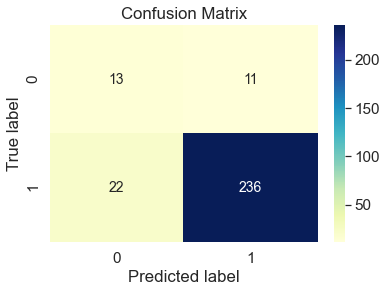

NB, Count Vectors: 
Accuracy on training data 86.81 %
Accuracy on testing data 88.3 %
              precision    recall  f1-score   support

           0       0.37      0.54      0.44        24
           1       0.96      0.91      0.93       258

    accuracy                           0.88       282
   macro avg       0.66      0.73      0.69       282
weighted avg       0.91      0.88      0.89       282

**************************************** End of first model ****************************************


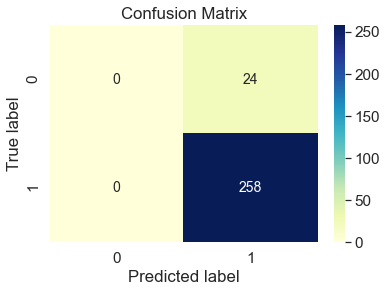

C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB, WordLevel TF-IDF: 
Accuracy on training data 93.67999999999999 %
Accuracy on testing data 91.49000000000001 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.91      1.00      0.96       258

    accuracy                           0.91       282
   macro avg       0.46      0.50      0.48       282
weighted avg       0.84      0.91      0.87       282

**************************************** End of first model ****************************************


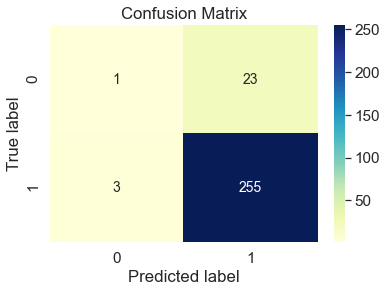

NB, N-Gram Vectors: 
Accuracy on training data 93.24 %
Accuracy on testing data 90.78 %
              precision    recall  f1-score   support

           0       0.25      0.04      0.07        24
           1       0.92      0.99      0.95       258

    accuracy                           0.91       282
   macro avg       0.58      0.52      0.51       282
weighted avg       0.86      0.91      0.88       282

**************************************** End of first model ****************************************


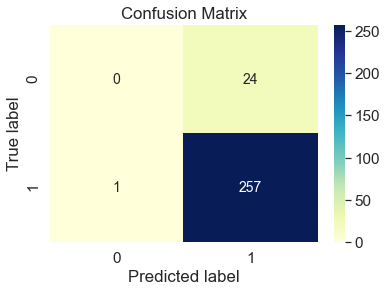

NB, CharLevel Vectors: 
Accuracy on training data 93.24 %
Accuracy on testing data 91.13 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.91      1.00      0.95       258

    accuracy                           0.91       282
   macro avg       0.46      0.50      0.48       282
weighted avg       0.84      0.91      0.87       282

**************************************** End of first model ****************************************


In [363]:
# Naive Bayes on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y_count, xvalid_count,"NB_CV.sav")
#confusion_matrix = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
print("NB, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf,"NB_WL_Tfidf.sav")
print("NB, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram,"NB_NL_Tfidf.sav")
print("NB, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,"NB_CL_Tfidf.sav")
print("NB, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Testing

In [52]:
# model_nb_cv = joblib.load('ml_model_pkl/NB_CV.sav')
# new_desc = ['''Hi Team,

# To keep you posted, we are launching a paid LinkedIn campaign for a  “web launch” post.
# Respective amount would get debited from the card, details are as below-

# •	Date: 15th to 20th September (6days)
# •	Spends per day: 500 INR ( total amount- 3000 INR , it may exceed a little as per the LinkedIn algorithm)
# •	Campaign for : India


# Please let us know, in case of any query. ''']
# labels = ["AR","NAR"]
# nb_count =  count_vect.transform(new_desc)
# #nb_count =  tfidf_vect.transform(new_desc)
# #nb_count =  tfidf_vect_ngram.transform(new_desc)
# #nb_count =  tfidf_vect_ngram_chars.transform(new_desc)
# pred = model_nb_cv.predict(nb_count)
# print(pred, labels[pred[0]])

# Linear Classifier

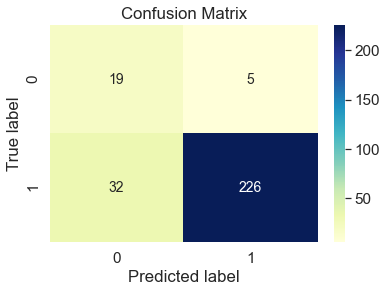

LR, Count Vectors: 
Accuracy on training data 97.49 %
Accuracy on testing data 86.88 %
              precision    recall  f1-score   support

           0       0.37      0.79      0.51        24
           1       0.98      0.88      0.92       258

    accuracy                           0.87       282
   macro avg       0.68      0.83      0.72       282
weighted avg       0.93      0.87      0.89       282

**************************************** End of first model ****************************************


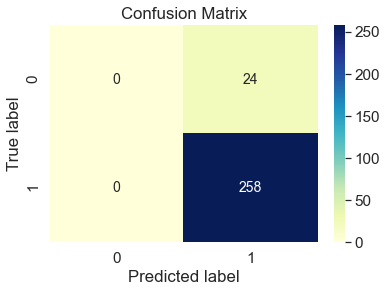

C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR, WordLevel TF-IDF: 
Accuracy on training data 93.77 %
Accuracy on testing data 91.49000000000001 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.91      1.00      0.96       258

    accuracy                           0.91       282
   macro avg       0.46      0.50      0.48       282
weighted avg       0.84      0.91      0.87       282

**************************************** End of first model ****************************************


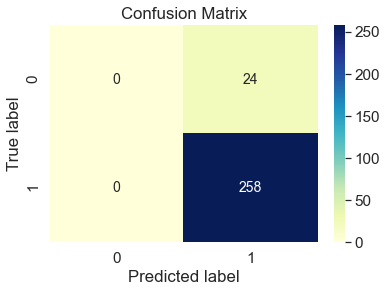

C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR, N-Gram Vectors: 
Accuracy on training data 93.77 %
Accuracy on testing data 91.49000000000001 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.91      1.00      0.96       258

    accuracy                           0.91       282
   macro avg       0.46      0.50      0.48       282
weighted avg       0.84      0.91      0.87       282

**************************************** End of first model ****************************************


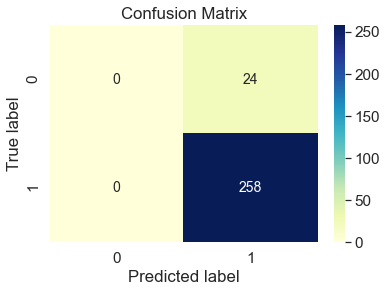

LR, CharLevel Vectors: 
Accuracy on training data 93.77 %
Accuracy on testing data 91.49000000000001 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.91      1.00      0.96       258

    accuracy                           0.91       282
   macro avg       0.46      0.50      0.48       282
weighted avg       0.84      0.91      0.87       282

**************************************** End of first model ****************************************


C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [365]:
# Linear Classifier on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_count, train_y_count, xvalid_count, "LG_CV.sav")
print("LR, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf, "LG_WL_Tfidf.sav")
print("LR, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, "LG_NL_Tfidf.sav")
print("LR, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,"LG_CL_Tfidf.sav")
print("LR, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# SVM Model

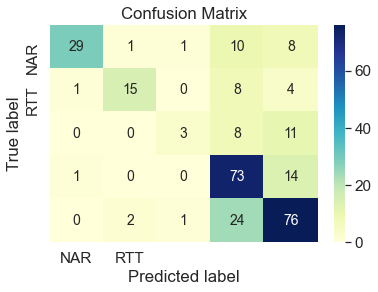

SVM, N-Gram Vectors:
Accuracy on training data 67.58999999999999 %
Accuracy on testing data 87.40299999999999 %
              precision    recall  f1-score   support

           0       0.94      0.59      0.72        49
           1       0.83      0.54      0.65        28
           2       0.60      0.14      0.22        22
           3       0.59      0.83      0.69        88
           4       0.67      0.74      0.70       103

    accuracy                           0.68       290
   macro avg       0.73      0.57      0.60       290
weighted avg       0.70      0.68      0.66       290

**************************************** End of first model ****************************************


In [54]:
# SVM on Ngram Level TF IDF Vectors
accuracy_test,accuracy_train,confusion_matrix,classification__ = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, "SVM_NL_Tfidf.sav")
print("SVM, N-Gram Vectors:")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,5)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Bagging Model

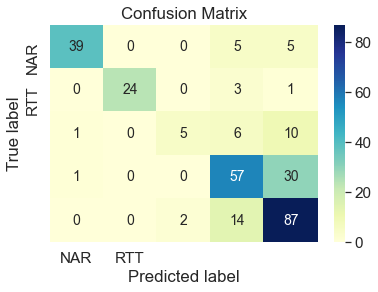

RF, Count Vectors: 
Accuracy on training data 99.396 %
Accuracy on testing data 73.1 %
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        49
           1       1.00      0.86      0.92        28
           2       0.71      0.23      0.34        22
           3       0.67      0.65      0.66        88
           4       0.65      0.84      0.74       103

    accuracy                           0.73       290
   macro avg       0.80      0.67      0.71       290
weighted avg       0.75      0.73      0.72       290

**************************************** End of first model ****************************************


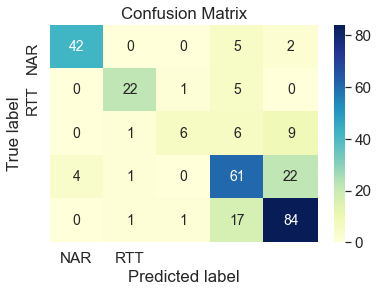

RF, WordLevel TF-IDF: 
Accuracy on training data 99.137 %
Accuracy on testing data 74.14 %
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        49
           1       0.88      0.79      0.83        28
           2       0.75      0.27      0.40        22
           3       0.65      0.69      0.67        88
           4       0.72      0.82      0.76       103

    accuracy                           0.74       290
   macro avg       0.78      0.68      0.71       290
weighted avg       0.75      0.74      0.73       290

**************************************** End of first model ****************************************


In [55]:
# RF on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count,"RF_CV.sav")
print("RF, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# RF on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf, "RF_WL_Tfidf.sav")
print("RF, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Boosting Model

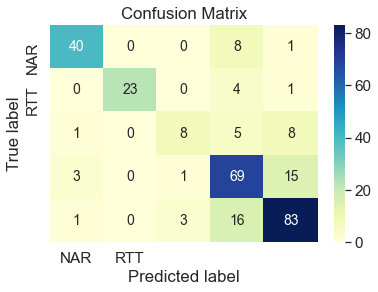

Xgb, Count Vectors: 
Accuracy on training data 94.82000000000001 %
Accuracy on testing data 76.9 %
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        49
           1       1.00      0.82      0.90        28
           2       0.67      0.36      0.47        22
           3       0.68      0.78      0.73        88
           4       0.77      0.81      0.79       103

    accuracy                           0.77       290
   macro avg       0.80      0.72      0.75       290
weighted avg       0.78      0.77      0.77       290

**************************************** End of first model ****************************************


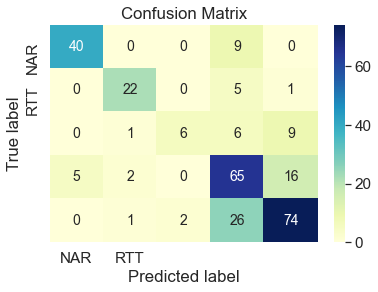

Xgb, WordLevel TF-IDF: 
Accuracy on training data 97.58 %
Accuracy on testing data 71.38 %
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        49
           1       0.85      0.79      0.81        28
           2       0.75      0.27      0.40        22
           3       0.59      0.74      0.65        88
           4       0.74      0.72      0.73       103

    accuracy                           0.71       290
   macro avg       0.76      0.67      0.69       290
weighted avg       0.73      0.71      0.71       290

**************************************** End of first model ****************************************


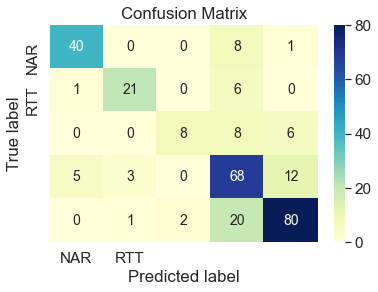

Xgb, CharLevel Vectors: 
Accuracy on training data 99.4 %
Accuracy on testing data 74.83 %
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        49
           1       0.84      0.75      0.79        28
           2       0.80      0.36      0.50        22
           3       0.62      0.77      0.69        88
           4       0.81      0.78      0.79       103

    accuracy                           0.75       290
   macro avg       0.79      0.70      0.72       290
weighted avg       0.76      0.75      0.75       290

**************************************** End of first model ****************************************


In [56]:
# Extereme Gradient Boosting on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc(),"XG_CV.sav")
print("Xgb, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc(),"XG_WL_Tfidf.sav")
print("Xgb, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc(),"XG_CL_Tfidf.sav")
print("Xgb, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Part-2 | 1 Vs All

inbox_AHAM 3
inbox_ATTENDANCE 155
inbox_AUS_VISA 18
inbox_CENTOR 18
inbox_CLAIMS_REIMBURSEMENTS 51
inbox_DOCUMENTS_LETTERS 5
inbox_EMPLOYEE_DATA 77
inbox_HRD 8
inbox_INCREMENTS 6
inbox_INDUCTION 8
inbox_INFRA 63
inbox_INSURANCE 7
inbox_INVOICES 11
inbox_IT_ONBOARDING_FORM 9
inbox_LEAVE 16
inbox_OTHERS 22
inbox_OVERDUE_RECEIVABLES 4
inbox_PROJECTS 17
inbox_RECRUITMENT 307
inbox_RESIGNATION 8
inbox_REWARDS_RECOGNITION 28
inbox_RSU 14
inbox_SALARY 19
inbox_TRAINING_DEVELOPMENT 4
inbox_UTILIZATION 9


In [49]:
inbox_ATTENDANCE_FIRST_RE = pandas.concat([inbox_ATTENDANCE,inbox_ATTENDANCE_RE],axis=0)

inbox_ATTENDANCE_FIRST_RE = inbox_ATTENDANCE_FIRST_RE.sample(frac=1).reset_index(drop=True)
inbox_ATTENDANCE_FIRST_RE.isna().sum()
inbox_ATTENDANCE_FIRST_RE = inbox_ATTENDANCE_FIRST_RE.replace(['NAR'],'ATT')
inbox_ATTENDANCE_FIRST_RE

,email,category
0,"Hi,\nPlease find my details inline.\n",ATT
1,"Hi , Please find the attendance for Sep20: Hol...",ATT
2,"Hi Neha,\nGood Morning.\nWe have raised concer...",ATT
3,Hi @Shivakumar Ambadgatti & @Ann John I have a...,ATT
4,"Hi Team,\nPlease find my attendance for May mo...",ATT
...,...,...
170,"\nHello Ann,\nPlease find below my data of Att...",ATT
171,"Hi,\nPlease find the details inline.\n",ATT
172,"Hello team,\nNo leaves for this month. thanks!\n",ATT
173,Type\nNo of days\nDates\nComments\nHolidays of...,ATT


In [50]:
# First time mail only | excluding recruitmnet folder as it has more number of mails
trainDF = pandas.concat([inbox_AHAM,inbox_ATTENDANCE_FIRST_RE,inbox_AUS_VISA ,inbox_CENTOR ,inbox_CLAIMS_REIMBURSEMENTS ,inbox_DOCUMENTS_LETTERS ,
inbox_EMPLOYEE_DATA ,inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS,
inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ],axis=0)

In [51]:
trainDF = trainDF.sample(frac=1).reset_index(drop=True)

In [52]:
trainDF = trainDF.replace(['RTT'],'NAR')

In [53]:
trainDF.tail(5)

,email,category
448,"Hi Team, Please find the attached Onboarding F...",NAR
449,Hi Ann\nOne day off (sick leave) – to get my t...,ATT
450,CAUTION: This email originated from outside of...,ATT
451,"Hi Team, I would like to apply an earned leave...",NAR
452,"Hi Team, Pls find attached reimbursement sheet...",NAR


In [54]:
trainDF["category"].value_counts()

NAR    278
ATT    175
Name: category, dtype: int64

In [55]:
trainDF.isna().sum()

email       10
category     0
dtype: int64

In [56]:
trainDF.dropna(inplace=True)

In [57]:
bad_chars = ['\n','\t','\r',';', ':', '!', "*","{{}}","<>","/","//","-.",'-:',".,",",.","--","#",">","<","&","-",",",".",
             "_","@","=","^","$","!","+","?"]

In [58]:
def text_process(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
#    text = sb.clean(text)
#     text = re.sub(r"{{NAME}}", "", text)
#     text = re.sub(r"{{EMAIL}}", "", text)
#     text = re.sub(r"<mailto>", "", text)
#     text = re.sub(r"<{{URL}}>", "", text)
#     text = re.sub(r"{{URL+EMAIL}}", "", text)
#     text = re.sub(r"{{URLNAMENAME}}", "", text)
#     text = re.sub(r"<>", "", text)
#     text = re.sub(r"{{}}", "", text)
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub("\\W"," ",text) # remove special chars
#    text = re.sub('https?://\S+|www\.\S+', '', text)
#    text = re.sub('<.*?>+', '', text)
#    text = re.sub('\w*\d\w*', '', text)
    text = ''.join(k for k in text if not k in bad_chars)
    text = [word for word in text.split() if word not in stopwords.words("english")]
    text = " ".join(text)

    return text

In [59]:
trainDF["email"] = trainDF["email"].apply(text_process)
trainDF.reset_index(inplace = True,drop = True)

In [60]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['email'], trainDF['category'],test_size=0.20)#
#X_train, X_test, y_train, y_test 

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [61]:
print(train_x.shape)
print(valid_x.shape)
print(train_y.shape)
print(valid_y.shape)

(354,)
(89,)
(354,)
(89,)


In [62]:
valid_y

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0])

In [63]:
checking=encoder.inverse_transform(valid_y)
checking

array(['ATT', 'NAR', 'ATT', 'ATT', 'NAR', 'ATT', 'ATT', 'NAR', 'NAR',
       'ATT', 'ATT', 'ATT', 'ATT', 'NAR', 'ATT', 'NAR', 'NAR', 'NAR',
       'NAR', 'NAR', 'ATT', 'NAR', 'ATT', 'NAR', 'NAR', 'ATT', 'NAR',
       'ATT', 'ATT', 'ATT', 'NAR', 'NAR', 'ATT', 'ATT', 'NAR', 'ATT',
       'ATT', 'NAR', 'ATT', 'NAR', 'ATT', 'NAR', 'NAR', 'NAR', 'NAR',
       'ATT', 'NAR', 'ATT', 'ATT', 'ATT', 'ATT', 'NAR', 'ATT', 'NAR',
       'ATT', 'ATT', 'NAR', 'NAR', 'NAR', 'ATT', 'NAR', 'NAR', 'ATT',
       'ATT', 'NAR', 'ATT', 'NAR', 'NAR', 'NAR', 'ATT', 'ATT', 'ATT',
       'ATT', 'ATT', 'NAR', 'ATT', 'NAR', 'ATT', 'NAR', 'NAR', 'ATT',
       'NAR', 'ATT', 'NAR', 'NAR', 'ATT', 'NAR', 'NAR', 'ATT'],
      dtype=object)

In [64]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['email'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [65]:
print(xtrain_count.shape)
print(xvalid_count.shape)

(354, 2544)
(89, 2544)


In [66]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=3200)
tfidf_vect.fit(trainDF['email'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=3200)
tfidf_vect_ngram.fit(trainDF['email'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=3200)
tfidf_vect_ngram_chars.fit(trainDF['email'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [67]:
count_vect_trans = count_vect.fit(trainDF['email'])
pickle.dump(count_vect_trans, open('ml_model_pkl/trans/{}'.format("count_vect_trans.sav"), 'wb'))

wl_tfidf_trans = tfidf_vect.fit(trainDF['email'])
pickle.dump(wl_tfidf_trans, open('ml_model_pkl/trans/{}'.format("wl_tfidf_trans.sav"), 'wb'))

ngl_tfidf_trans = tfidf_vect_ngram.fit(trainDF['email'])
pickle.dump(ngl_tfidf_trans, open('ml_model_pkl/trans/{}'.format("ngl_tfidf_trans.sav"), 'wb'))
    
cl_tfidf_trans = tfidf_vect_ngram_chars.fit(trainDF['email'])
pickle.dump(cl_tfidf_trans, open('ml_model_pkl/trans/{}'.format("cl_tfidf_trans.sav"), 'wb'))


C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [68]:
count_vect_trans_ = joblib.load('ml_model_pkl/trans/count_vect_trans.sav')

wl_tfidf_trans_ = joblib.load('ml_model_pkl/trans/wl_tfidf_trans.sav')

ngl_tfidf_trans_ = joblib.load('ml_model_pkl/trans/ngl_tfidf_trans.sav')

cl_tfidf_trans_ = joblib.load('ml_model_pkl/trans/cl_tfidf_trans.sav')


In [69]:
trainDF['char_count'] = trainDF['email'].apply(len)
trainDF['word_count'] = trainDF['email'].apply(lambda x: len(x.split()))
trainDF['word_density'] = trainDF['char_count'] / (trainDF['word_count']+1)
trainDF['punctuation_count'] = trainDF['email'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
trainDF['title_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
trainDF['upper_case_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [70]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

trainDF['noun_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'noun'))
trainDF['verb_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'verb'))
trainDF['adj_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adj'))
trainDF['adv_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adv'))
trainDF['pron_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'pron'))

In [71]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [72]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,model_name, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    pickle.dump(classifier, open('ml_model_pkl/{}'.format(model_name), 'wb'))
    
    # predict the labels on validation dataset
    predictions_train = classifier.predict(feature_vector_train)
    predictions_test = classifier.predict(feature_vector_valid)
    
#     for i,j in zip(valid_y,predictions_test):
#         if i == j:
#             print("Equal",i,j)
#         else:
#             print("Not Equal",i,j)
    
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(train_y,predictions_train),metrics.accuracy_score(valid_y,predictions_test),plot_confussion_matrix(valid_y,predictions_test),classification_report(valid_y, predictions_test)

In [73]:
# Create the confussion matrix
def plot_confussion_matrix(valid_y,predictions):
    ''' Plot the confussion matrix for the target labels and predictions '''
    
    X_labels = ['NAR',"RTT"]
    Y_labels = ["NAR","RTT"]
    cm = metrics.confusion_matrix(valid_y,predictions)
    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm,cmap="YlGnBu",annot=True,fmt='.0f',annot_kws={"size": 14},xticklabels=X_labels,yticklabels=Y_labels)# font size ,
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

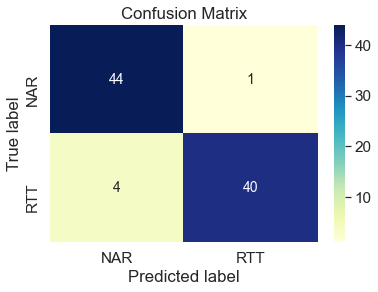

NB, Count Vectors: 
Accuracy on training data 99.72 %
Accuracy on testing data 94.38 %
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        45
           1       0.98      0.91      0.94        44

    accuracy                           0.94        89
   macro avg       0.95      0.94      0.94        89
weighted avg       0.95      0.94      0.94        89

**************************************** End of first model ****************************************


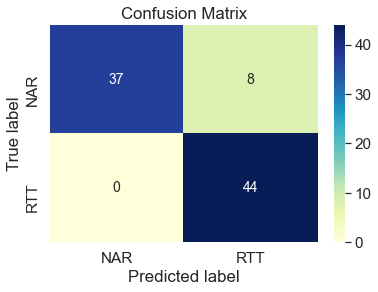

NB, WordLevel TF-IDF: 
Accuracy on training data 96.33 %
Accuracy on testing data 91.01 %
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        45
           1       0.85      1.00      0.92        44

    accuracy                           0.91        89
   macro avg       0.92      0.91      0.91        89
weighted avg       0.92      0.91      0.91        89

**************************************** End of first model ****************************************


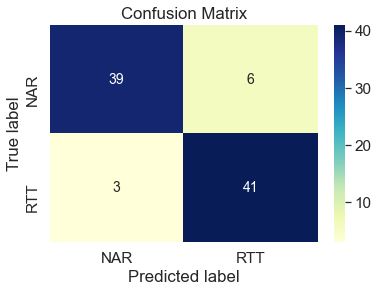

NB, N-Gram Vectors: 
Accuracy on training data 96.61 %
Accuracy on testing data 89.89 %
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        45
           1       0.87      0.93      0.90        44

    accuracy                           0.90        89
   macro avg       0.90      0.90      0.90        89
weighted avg       0.90      0.90      0.90        89

**************************************** End of first model ****************************************


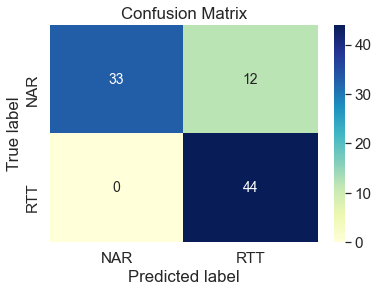

NB, CharLevel Vectors: 
Accuracy on training data 89.27000000000001 %
Accuracy on testing data 86.52 %
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        45
           1       0.79      1.00      0.88        44

    accuracy                           0.87        89
   macro avg       0.89      0.87      0.86        89
weighted avg       0.89      0.87      0.86        89

**************************************** End of first model ****************************************


In [74]:
# Naive Bayes on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
#confusion_matrix = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
print("NB, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf,"NB_WL_Tfidf.sav")
print("NB, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram,"NB_NL_Tfidf.sav")
print("NB, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,"NB_CL_Tfidf.sav")
print("NB, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


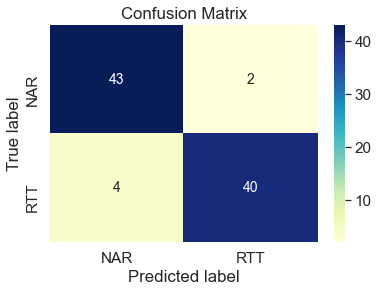

LR, Count Vectors: 
Accuracy on training data 100.0 %
Accuracy on testing data 93.26 %
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        45
           1       0.95      0.91      0.93        44

    accuracy                           0.93        89
   macro avg       0.93      0.93      0.93        89
weighted avg       0.93      0.93      0.93        89

**************************************** End of first model ****************************************


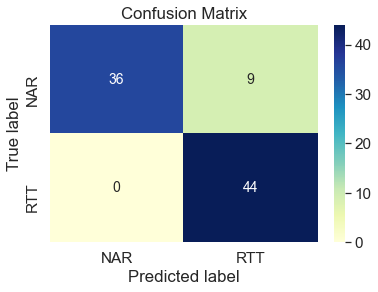

LR, WordLevel TF-IDF: 
Accuracy on training data 93.5 %
Accuracy on testing data 89.89 %
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        45
           1       0.83      1.00      0.91        44

    accuracy                           0.90        89
   macro avg       0.92      0.90      0.90        89
weighted avg       0.92      0.90      0.90        89

**************************************** End of first model ****************************************


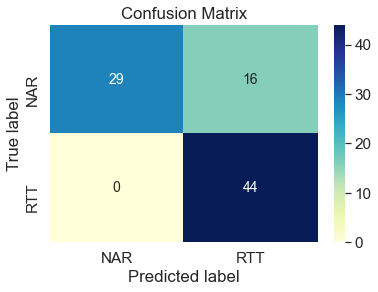

LR, N-Gram Vectors: 
Accuracy on training data 93.78999999999999 %
Accuracy on testing data 82.02000000000001 %
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        45
           1       0.73      1.00      0.85        44

    accuracy                           0.82        89
   macro avg       0.87      0.82      0.81        89
weighted avg       0.87      0.82      0.81        89

**************************************** End of first model ****************************************


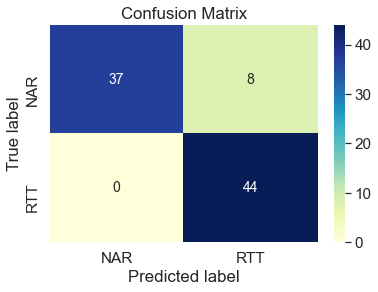

LR, CharLevel Vectors: 
Accuracy on training data 94.63000000000001 %
Accuracy on testing data 91.01 %
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        45
           1       0.85      1.00      0.92        44

    accuracy                           0.91        89
   macro avg       0.92      0.91      0.91        89
weighted avg       0.92      0.91      0.91        89

**************************************** End of first model ****************************************


In [75]:
# Linear Classifier on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count, "LG_CV.sav")
print("LR, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf, "LG_WL_Tfidf.sav")
print("LR, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, "LG_NL_Tfidf.sav")
print("LR, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,"LG_CL_Tfidf.sav")
print("LR, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


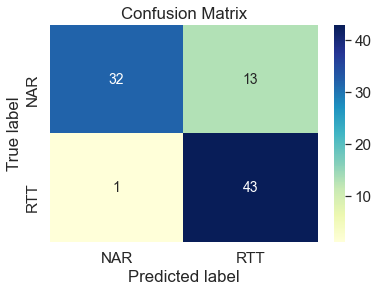

SVM, N-Gram Vectors:
Accuracy on training data 84.27 %
Accuracy on testing data 98.588 %
              precision    recall  f1-score   support

           0       0.97      0.71      0.82        45
           1       0.77      0.98      0.86        44

    accuracy                           0.84        89
   macro avg       0.87      0.84      0.84        89
weighted avg       0.87      0.84      0.84        89

**************************************** End of first model ****************************************


In [76]:
# SVM on Ngram Level TF IDF Vectors
accuracy_test,accuracy_train,confusion_matrix,classification__ = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, "SVM_NL_Tfidf.sav")
print("SVM, N-Gram Vectors:")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,5)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


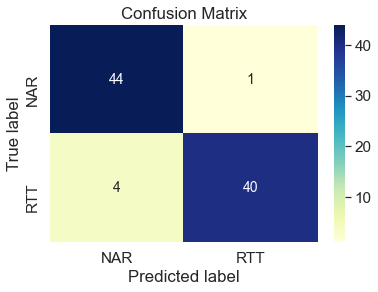

RF, Count Vectors: 
Accuracy on training data 100.0 %
Accuracy on testing data 94.38 %
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        45
           1       0.98      0.91      0.94        44

    accuracy                           0.94        89
   macro avg       0.95      0.94      0.94        89
weighted avg       0.95      0.94      0.94        89

**************************************** End of first model ****************************************


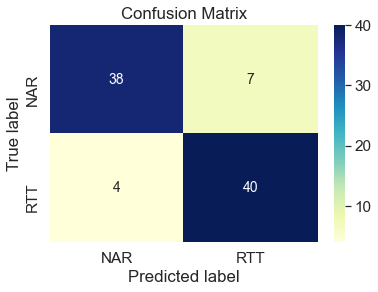

RF, WordLevel TF-IDF: 
Accuracy on training data 100.0 %
Accuracy on testing data 87.64 %
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        45
           1       0.85      0.91      0.88        44

    accuracy                           0.88        89
   macro avg       0.88      0.88      0.88        89
weighted avg       0.88      0.88      0.88        89

**************************************** End of first model ****************************************


In [77]:
# RF on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count,"RF_CV.sav")
print("RF, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# RF on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf, "RF_WL_Tfidf.sav")
print("RF, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


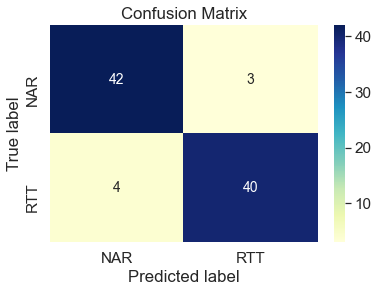

Xgb, Count Vectors: 
Accuracy on training data 99.15 %
Accuracy on testing data 92.13 %
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.93      0.91      0.92        44

    accuracy                           0.92        89
   macro avg       0.92      0.92      0.92        89
weighted avg       0.92      0.92      0.92        89

**************************************** End of first model ****************************************


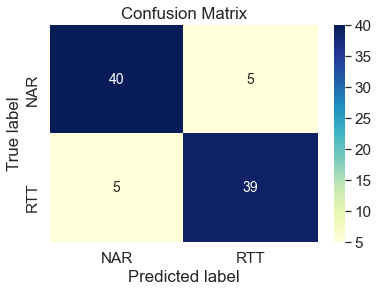

Xgb, WordLevel TF-IDF: 
Accuracy on training data 99.72 %
Accuracy on testing data 88.75999999999999 %
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        45
           1       0.89      0.89      0.89        44

    accuracy                           0.89        89
   macro avg       0.89      0.89      0.89        89
weighted avg       0.89      0.89      0.89        89

**************************************** End of first model ****************************************


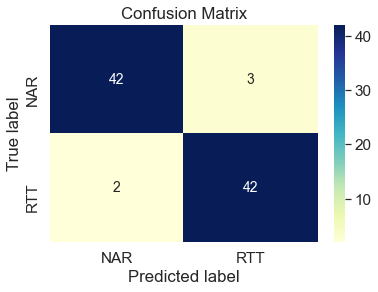

Xgb, CharLevel Vectors: 
Accuracy on training data 100.0 %
Accuracy on testing data 94.38 %
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        45
           1       0.93      0.95      0.94        44

    accuracy                           0.94        89
   macro avg       0.94      0.94      0.94        89
weighted avg       0.94      0.94      0.94        89

**************************************** End of first model ****************************************


In [78]:
# Extereme Gradient Boosting on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc(),"XG_CV.sav")
print("Xgb, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc(),"XG_WL_Tfidf.sav")
print("Xgb, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc(),"XG_CL_Tfidf.sav")
print("Xgb, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Part-3 | CLAIMS-REIMBURSMENTS Vs All

In [81]:
inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE = pandas.concat([inbox_CLAIMS_REIMBURSEMENTS,inbox_CLAIMS_REIMBURSEMENTS_RE],axis=0)

inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE = inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE.sample(frac=1).reset_index(drop=True)
inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE.isna().sum()
inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE = inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE.replace(['NAR'],'CLM')
inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE

,email,category
0,Hi Prabhash PFA Reimbursement Sheet 17.11.20. ...,CLM
1,"Hi Ann, Please find the receipt for the busine...",CLM
2,Hi Prabhash PFA Reimbursement Sheet 17.11.20. ...,CLM
3,"Hi Ann, Below are the details for the expenses...",CLM
4,"Hi, Please find attached the Reimbursement She...",CLM
...,...,...
264,"Hi Ann, Below are the details for the expenses...",CLM
265,"Hello Team, I am requesting reimbursement for ...",CLM
266,"Hi Prakash, As discussed I will be enrolling f...",CLM
267,"Hi, The following company expenses were debite...",CLM


In [82]:
# First time mail only | excluding recruitmnet folder as it has more number of mails
trainDF = pandas.concat([inbox_AHAM,inbox_ATTENDANCE,inbox_AUS_VISA ,inbox_CENTOR ,inbox_CLAIMS_REIMBURSEMENTS_FIRST_RE ,inbox_DOCUMENTS_LETTERS ,
inbox_EMPLOYEE_DATA ,inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS,
inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ],axis=0)

In [83]:
trainDF = trainDF.sample(frac=1).reset_index(drop=True)

In [ ]:
#trainDF = trainDF.replace(['RTT'],'NAR')

In [ ]:
trainDF.tail(5)

In [84]:
trainDF["category"].value_counts()

CLM    269
NAR    189
Name: category, dtype: int64

In [85]:
trainDF.isna().sum()

email       11
category     0
dtype: int64

In [87]:
trainDF.dropna(inplace=True)

In [88]:
trainDF.isna().sum()

email       0
category    0
dtype: int64

In [89]:
bad_chars = ['\n','\t','\r',';', ':', '!', "*","{{}}","<>","/","//","-.",'-:',".,",",.","--","#",">","<","&","-",",",".",
             "_","@","=","^","$","!","+","?"]

In [90]:
def text_process(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
#    text = sb.clean(text)
#     text = re.sub(r"{{NAME}}", "", text)
#     text = re.sub(r"{{EMAIL}}", "", text)
#     text = re.sub(r"<mailto>", "", text)
#     text = re.sub(r"<{{URL}}>", "", text)
#     text = re.sub(r"{{URL+EMAIL}}", "", text)
#     text = re.sub(r"{{URLNAMENAME}}", "", text)
#     text = re.sub(r"<>", "", text)
#     text = re.sub(r"{{}}", "", text)
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub("\\W"," ",text) # remove special chars
#    text = re.sub('https?://\S+|www\.\S+', '', text)
#    text = re.sub('<.*?>+', '', text)
#    text = re.sub('\w*\d\w*', '', text)
    text = ''.join(k for k in text if not k in bad_chars)
    text = [word for word in text.split() if word not in stopwords.words("english")]
    text = " ".join(text)

    return text

In [91]:
trainDF["email"] = trainDF["email"].apply(text_process)
trainDF.reset_index(inplace = True,drop = True)

In [92]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['email'], trainDF['category'],test_size=0.20)#
#X_train, X_test, y_train, y_test 

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [93]:
print(train_x.shape)
print(valid_x.shape)
print(train_y.shape)
print(valid_y.shape)

(357,)
(90,)
(357,)
(90,)


In [94]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['email'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [95]:
print(xtrain_count.shape)
print(xvalid_count.shape)

(357, 2188)
(90, 2188)


In [96]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=3200)
tfidf_vect.fit(trainDF['email'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=3200)
tfidf_vect_ngram.fit(trainDF['email'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=3200)
tfidf_vect_ngram_chars.fit(trainDF['email'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [97]:
count_vect_trans = count_vect.fit(trainDF['email'])
pickle.dump(count_vect_trans, open('ml_model_pkl/trans/{}'.format("count_vect_trans.sav"), 'wb'))

wl_tfidf_trans = tfidf_vect.fit(trainDF['email'])
pickle.dump(wl_tfidf_trans, open('ml_model_pkl/trans/{}'.format("wl_tfidf_trans.sav"), 'wb'))

ngl_tfidf_trans = tfidf_vect_ngram.fit(trainDF['email'])
pickle.dump(ngl_tfidf_trans, open('ml_model_pkl/trans/{}'.format("ngl_tfidf_trans.sav"), 'wb'))
    
cl_tfidf_trans = tfidf_vect_ngram_chars.fit(trainDF['email'])
pickle.dump(cl_tfidf_trans, open('ml_model_pkl/trans/{}'.format("cl_tfidf_trans.sav"), 'wb'))


C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [98]:
count_vect_trans_ = joblib.load('ml_model_pkl/trans/count_vect_trans.sav')

wl_tfidf_trans_ = joblib.load('ml_model_pkl/trans/wl_tfidf_trans.sav')

ngl_tfidf_trans_ = joblib.load('ml_model_pkl/trans/ngl_tfidf_trans.sav')

cl_tfidf_trans_ = joblib.load('ml_model_pkl/trans/cl_tfidf_trans.sav')


In [99]:
trainDF['char_count'] = trainDF['email'].apply(len)
trainDF['word_count'] = trainDF['email'].apply(lambda x: len(x.split()))
trainDF['word_density'] = trainDF['char_count'] / (trainDF['word_count']+1)
trainDF['punctuation_count'] = trainDF['email'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
trainDF['title_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
trainDF['upper_case_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [100]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

trainDF['noun_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'noun'))
trainDF['verb_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'verb'))
trainDF['adj_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adj'))
trainDF['adv_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adv'))
trainDF['pron_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'pron'))

In [101]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [102]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,model_name, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    pickle.dump(classifier, open('ml_model_pkl/{}'.format(model_name), 'wb'))
    
    # predict the labels on validation dataset
    predictions_train = classifier.predict(feature_vector_train)
    predictions_test = classifier.predict(feature_vector_valid)
    
#     for i,j in zip(valid_y,predictions_test):
#         if i == j:
#             print("Equal",i,j)
#         else:
#             print("Not Equal",i,j)
    
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(train_y,predictions_train),metrics.accuracy_score(valid_y,predictions_test),plot_confussion_matrix(valid_y,predictions_test),classification_report(valid_y, predictions_test)

In [103]:
# Create the confussion matrix
def plot_confussion_matrix(valid_y,predictions):
    ''' Plot the confussion matrix for the target labels and predictions '''
    
    X_labels = ['NAR',"RTT"]
    Y_labels = ["NAR","RTT"]
    cm = metrics.confusion_matrix(valid_y,predictions)
    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm,cmap="YlGnBu",annot=True,fmt='.0f',annot_kws={"size": 14},xticklabels=X_labels,yticklabels=Y_labels)# font size ,
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

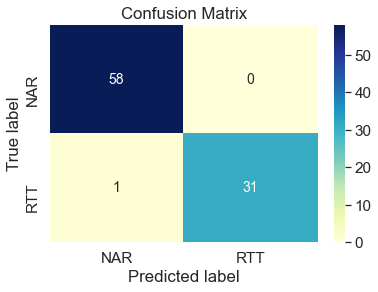

NB, Count Vectors: 
Accuracy on training data 99.44 %
Accuracy on testing data 98.89 %
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.97      0.98        32

    accuracy                           0.99        90
   macro avg       0.99      0.98      0.99        90
weighted avg       0.99      0.99      0.99        90

**************************************** End of first model ****************************************


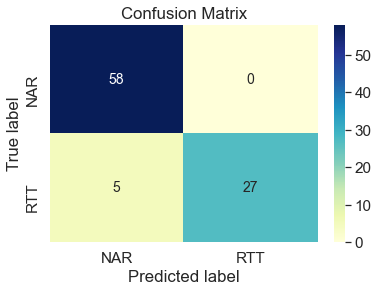

NB, WordLevel TF-IDF: 
Accuracy on training data 99.16 %
Accuracy on testing data 94.44 %
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        58
           1       1.00      0.84      0.92        32

    accuracy                           0.94        90
   macro avg       0.96      0.92      0.94        90
weighted avg       0.95      0.94      0.94        90

**************************************** End of first model ****************************************


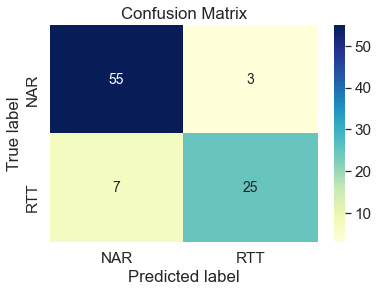

NB, N-Gram Vectors: 
Accuracy on training data 97.76 %
Accuracy on testing data 88.89 %
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        58
           1       0.89      0.78      0.83        32

    accuracy                           0.89        90
   macro avg       0.89      0.86      0.88        90
weighted avg       0.89      0.89      0.89        90

**************************************** End of first model ****************************************


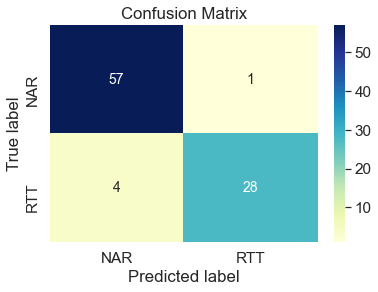

NB, CharLevel Vectors: 
Accuracy on training data 96.92 %
Accuracy on testing data 94.44 %
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.97      0.88      0.92        32

    accuracy                           0.94        90
   macro avg       0.95      0.93      0.94        90
weighted avg       0.95      0.94      0.94        90

**************************************** End of first model ****************************************


In [104]:
# Naive Bayes on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
#confusion_matrix = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
print("NB, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf,"NB_WL_Tfidf.sav")
print("NB, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram,"NB_NL_Tfidf.sav")
print("NB, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,"NB_CL_Tfidf.sav")
print("NB, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


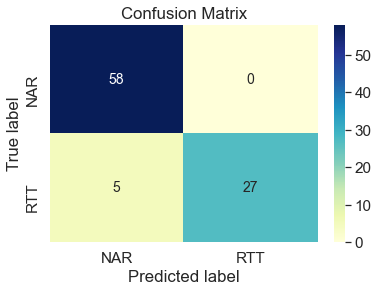

LR, Count Vectors: 
Accuracy on training data 100.0 %
Accuracy on testing data 94.44 %
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        58
           1       1.00      0.84      0.92        32

    accuracy                           0.94        90
   macro avg       0.96      0.92      0.94        90
weighted avg       0.95      0.94      0.94        90

**************************************** End of first model ****************************************


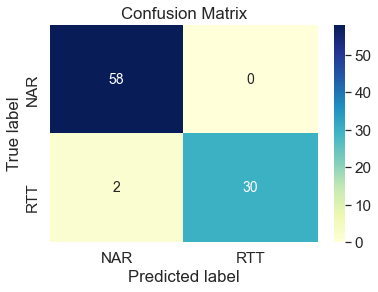

LR, WordLevel TF-IDF: 
Accuracy on training data 100.0 %
Accuracy on testing data 97.78 %
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.94      0.97        32

    accuracy                           0.98        90
   macro avg       0.98      0.97      0.98        90
weighted avg       0.98      0.98      0.98        90

**************************************** End of first model ****************************************


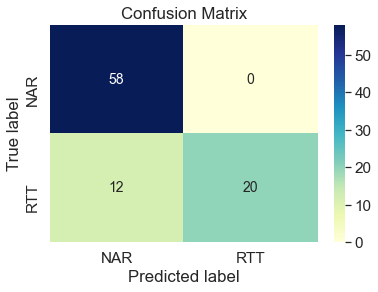

LR, N-Gram Vectors: 
Accuracy on training data 97.2 %
Accuracy on testing data 86.67 %
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        58
           1       1.00      0.62      0.77        32

    accuracy                           0.87        90
   macro avg       0.91      0.81      0.84        90
weighted avg       0.89      0.87      0.86        90

**************************************** End of first model ****************************************


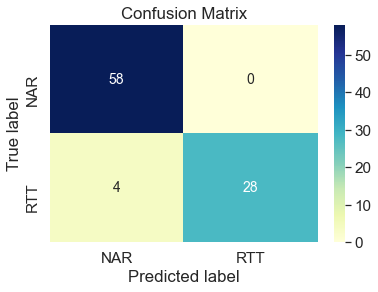

LR, CharLevel Vectors: 
Accuracy on training data 99.44 %
Accuracy on testing data 95.56 %
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.88      0.93        32

    accuracy                           0.96        90
   macro avg       0.97      0.94      0.95        90
weighted avg       0.96      0.96      0.95        90

**************************************** End of first model ****************************************


In [105]:
# Linear Classifier on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count, "LG_CV.sav")
print("LR, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf, "LG_WL_Tfidf.sav")
print("LR, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, "LG_NL_Tfidf.sav")
print("LR, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,"LG_CL_Tfidf.sav")
print("LR, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


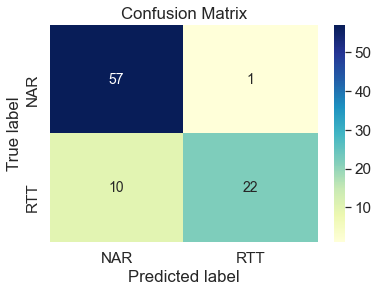

SVM, N-Gram Vectors:
Accuracy on training data 87.78 %
Accuracy on testing data 98.599 %
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        58
           1       0.96      0.69      0.80        32

    accuracy                           0.88        90
   macro avg       0.90      0.84      0.86        90
weighted avg       0.89      0.88      0.87        90

**************************************** End of first model ****************************************


In [106]:
# SVM on Ngram Level TF IDF Vectors
accuracy_test,accuracy_train,confusion_matrix,classification__ = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, "SVM_NL_Tfidf.sav")
print("SVM, N-Gram Vectors:")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,5)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


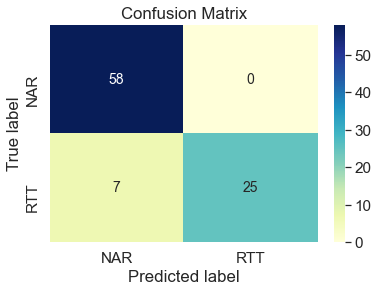

RF, Count Vectors: 
Accuracy on training data 100.0 %
Accuracy on testing data 92.22 %
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        58
           1       1.00      0.78      0.88        32

    accuracy                           0.92        90
   macro avg       0.95      0.89      0.91        90
weighted avg       0.93      0.92      0.92        90

**************************************** End of first model ****************************************


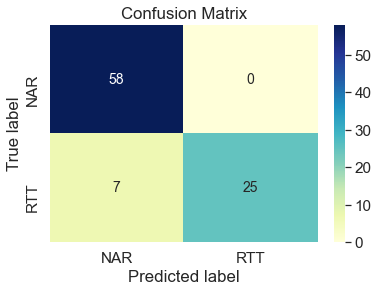

RF, WordLevel TF-IDF: 
Accuracy on training data 100.0 %
Accuracy on testing data 92.22 %
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        58
           1       1.00      0.78      0.88        32

    accuracy                           0.92        90
   macro avg       0.95      0.89      0.91        90
weighted avg       0.93      0.92      0.92        90

**************************************** End of first model ****************************************


In [107]:
# RF on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count,"RF_CV.sav")
print("RF, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# RF on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf, "RF_WL_Tfidf.sav")
print("RF, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


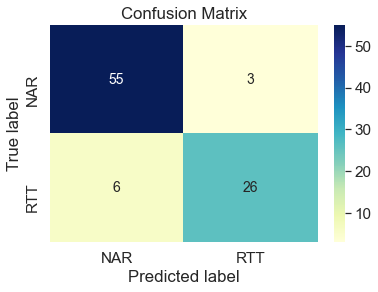

Xgb, Count Vectors: 
Accuracy on training data 100.0 %
Accuracy on testing data 90.0 %
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        58
           1       0.90      0.81      0.85        32

    accuracy                           0.90        90
   macro avg       0.90      0.88      0.89        90
weighted avg       0.90      0.90      0.90        90

**************************************** End of first model ****************************************


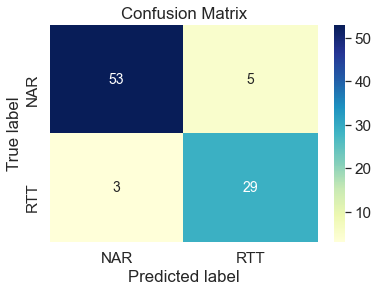

Xgb, WordLevel TF-IDF: 
Accuracy on training data 100.0 %
Accuracy on testing data 91.11 %
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        58
           1       0.85      0.91      0.88        32

    accuracy                           0.91        90
   macro avg       0.90      0.91      0.90        90
weighted avg       0.91      0.91      0.91        90

**************************************** End of first model ****************************************


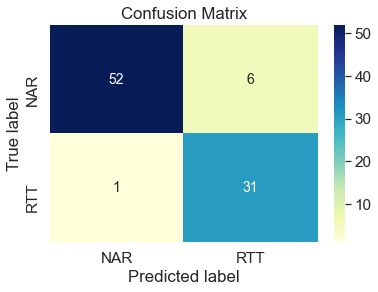

Xgb, CharLevel Vectors: 
Accuracy on training data 100.0 %
Accuracy on testing data 92.22 %
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        58
           1       0.84      0.97      0.90        32

    accuracy                           0.92        90
   macro avg       0.91      0.93      0.92        90
weighted avg       0.93      0.92      0.92        90

**************************************** End of first model ****************************************


In [108]:
# Extereme Gradient Boosting on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc(),"XG_CV.sav")
print("Xgb, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc(),"XG_WL_Tfidf.sav")
print("Xgb, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc(),"XG_CL_Tfidf.sav")
print("Xgb, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Part-4 EMPLOYEE DATA Vs All

In [110]:
inbox_EMPLOYEE_DATA_FIRST_RE = pandas.concat([inbox_EMPLOYEE_DATA,inbox_EMPLOYEE_DATA_RE],axis=0)

inbox_EMPLOYEE_DATA_FIRST_RE = inbox_EMPLOYEE_DATA_FIRST_RE.sample(frac=1).reset_index(drop=True)
inbox_EMPLOYEE_DATA_FIRST_RE.isna().sum()
inbox_EMPLOYEE_DATA_FIRST_RE = inbox_EMPLOYEE_DATA_FIRST_RE.replace(['NAR'],'EMP')
inbox_EMPLOYEE_DATA_FIRST_RE

,email,category
0,"Hi Team,\nPlease find the details below:\nPers...",EMP
1,"\nHi Ann,\nI had received my postal mail for T...",EMP
2,"\nSir,\nFirst of all thank you for choosing me...",EMP
3,"\nWelcome Note\nOn Mon, Apr 5, 2021 at 2:01 PM...",EMP
4,"\nHi Ann,\nI have updated the requested detail...",EMP
...,...,...
93,"Hi Angela, Updating my account details Account...",EMP
94,HI\nI'm an experienced software engineer who c...,EMP
95,"\nHi Team,\nPlease find all the details below....",EMP
96,"\nHi Padmasree,\nPFA personal and professiona...",EMP


In [114]:
# First time mail only | excluding recruitmnet folder as it has more number of mails
trainDF = pandas.concat([inbox_AHAM,inbox_ATTENDANCE,inbox_AUS_VISA ,inbox_CENTOR ,inbox_CLAIMS_REIMBURSEMENTS ,inbox_DOCUMENTS_LETTERS ,
inbox_EMPLOYEE_DATA_FIRST_RE ,inbox_HRD ,inbox_INCREMENTS ,inbox_INDUCTION ,inbox_INFRA ,inbox_INSURANCE ,inbox_INVOICES ,
inbox_IT_ONBOARDING_FORM ,inbox_LEAVE ,inbox_OTHERS ,inbox_OVERDUE_RECEIVABLES ,inbox_PROJECTS,
inbox_RESIGNATION ,inbox_REWARDS_RECOGNITION ,inbox_RSU ,inbox_SALARY ,inbox_TRAINING_DEVELOPMENT ,inbox_UTILIZATION ],axis=0)

In [115]:
trainDF = trainDF.sample(frac=1).reset_index(drop=True)

In [116]:
trainDF["category"].value_counts()

NAR    277
EMP     98
Name: category, dtype: int64

In [117]:
trainDF.isna().sum()

email       10
category     0
dtype: int64

In [118]:
trainDF.dropna(inplace=True)

In [119]:
trainDF.isna().sum()

email       0
category    0
dtype: int64

In [120]:
bad_chars = ['\n','\t','\r',';', ':', '!', "*","{{}}","<>","/","//","-.",'-:',".,",",.","--","#",">","<","&","-",",",".",
             "_","@","=","^","$","!","+","?"]

In [121]:
def text_process(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
#    text = sb.clean(text)
#     text = re.sub(r"{{NAME}}", "", text)
#     text = re.sub(r"{{EMAIL}}", "", text)
#     text = re.sub(r"<mailto>", "", text)
#     text = re.sub(r"<{{URL}}>", "", text)
#     text = re.sub(r"{{URL+EMAIL}}", "", text)
#     text = re.sub(r"{{URLNAMENAME}}", "", text)
#     text = re.sub(r"<>", "", text)
#     text = re.sub(r"{{}}", "", text)
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub("\\W"," ",text) # remove special chars
#    text = re.sub('https?://\S+|www\.\S+', '', text)
#    text = re.sub('<.*?>+', '', text)
#    text = re.sub('\w*\d\w*', '', text)
    text = ''.join(k for k in text if not k in bad_chars)
    text = [word for word in text.split() if word not in stopwords.words("english")]
    text = " ".join(text)

    return text

In [122]:
trainDF["email"] = trainDF["email"].apply(text_process)
trainDF.reset_index(inplace = True,drop = True)

In [123]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['email'], trainDF['category'],test_size=0.20)#
#X_train, X_test, y_train, y_test 

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [124]:
print(train_x.shape)
print(valid_x.shape)
print(train_y.shape)
print(valid_y.shape)

(292,)
(73,)
(292,)
(73,)


In [125]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['email'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [126]:
print(xtrain_count.shape)
print(xvalid_count.shape)

(292, 3003)
(73, 3003)


In [127]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=3200)
tfidf_vect.fit(trainDF['email'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=3200)
tfidf_vect_ngram.fit(trainDF['email'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=3200)
tfidf_vect_ngram_chars.fit(trainDF['email'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [128]:
count_vect_trans = count_vect.fit(trainDF['email'])
pickle.dump(count_vect_trans, open('ml_model_pkl/trans/{}'.format("count_vect_trans.sav"), 'wb'))

wl_tfidf_trans = tfidf_vect.fit(trainDF['email'])
pickle.dump(wl_tfidf_trans, open('ml_model_pkl/trans/{}'.format("wl_tfidf_trans.sav"), 'wb'))

ngl_tfidf_trans = tfidf_vect_ngram.fit(trainDF['email'])
pickle.dump(ngl_tfidf_trans, open('ml_model_pkl/trans/{}'.format("ngl_tfidf_trans.sav"), 'wb'))
    
cl_tfidf_trans = tfidf_vect_ngram_chars.fit(trainDF['email'])
pickle.dump(cl_tfidf_trans, open('ml_model_pkl/trans/{}'.format("cl_tfidf_trans.sav"), 'wb'))


C:\Users\mansurya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [129]:
count_vect_trans_ = joblib.load('ml_model_pkl/trans/count_vect_trans.sav')

wl_tfidf_trans_ = joblib.load('ml_model_pkl/trans/wl_tfidf_trans.sav')

ngl_tfidf_trans_ = joblib.load('ml_model_pkl/trans/ngl_tfidf_trans.sav')

cl_tfidf_trans_ = joblib.load('ml_model_pkl/trans/cl_tfidf_trans.sav')


In [130]:
trainDF['char_count'] = trainDF['email'].apply(len)
trainDF['word_count'] = trainDF['email'].apply(lambda x: len(x.split()))
trainDF['word_density'] = trainDF['char_count'] / (trainDF['word_count']+1)
trainDF['punctuation_count'] = trainDF['email'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
trainDF['title_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
trainDF['upper_case_word_count'] = trainDF['email'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [131]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

trainDF['noun_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'noun'))
trainDF['verb_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'verb'))
trainDF['adj_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adj'))
trainDF['adv_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'adv'))
trainDF['pron_count'] = trainDF['email'].apply(lambda x: check_pos_tag(x, 'pron'))

In [132]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [133]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,model_name, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    pickle.dump(classifier, open('ml_model_pkl/{}'.format(model_name), 'wb'))
    
    # predict the labels on validation dataset
    predictions_train = classifier.predict(feature_vector_train)
    predictions_test = classifier.predict(feature_vector_valid)
    
#     for i,j in zip(valid_y,predictions_test):
#         if i == j:
#             print("Equal",i,j)
#         else:
#             print("Not Equal",i,j)
    
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(train_y,predictions_train),metrics.accuracy_score(valid_y,predictions_test),plot_confussion_matrix(valid_y,predictions_test),classification_report(valid_y, predictions_test)

In [134]:
# Create the confussion matrix
def plot_confussion_matrix(valid_y,predictions):
    ''' Plot the confussion matrix for the target labels and predictions '''
    
    X_labels = ['NAR',"RTT"]
    Y_labels = ["NAR","RTT"]
    cm = metrics.confusion_matrix(valid_y,predictions)
    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm,cmap="YlGnBu",annot=True,fmt='.0f',annot_kws={"size": 14},xticklabels=X_labels,yticklabels=Y_labels)# font size ,
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

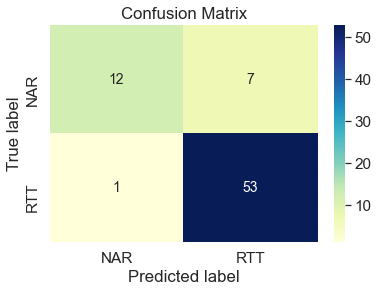

NB, Count Vectors: 
Accuracy on training data 96.58 %
Accuracy on testing data 89.03999999999999 %
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       0.88      0.98      0.93        54

    accuracy                           0.89        73
   macro avg       0.90      0.81      0.84        73
weighted avg       0.89      0.89      0.88        73

**************************************** End of first model ****************************************


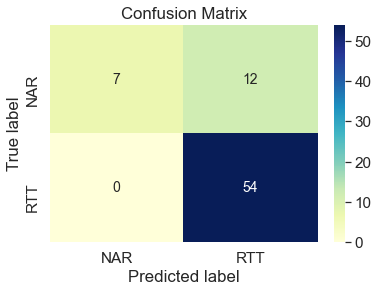

NB, WordLevel TF-IDF: 
Accuracy on training data 90.07 %
Accuracy on testing data 83.56 %
              precision    recall  f1-score   support

           0       1.00      0.37      0.54        19
           1       0.82      1.00      0.90        54

    accuracy                           0.84        73
   macro avg       0.91      0.68      0.72        73
weighted avg       0.87      0.84      0.81        73

**************************************** End of first model ****************************************


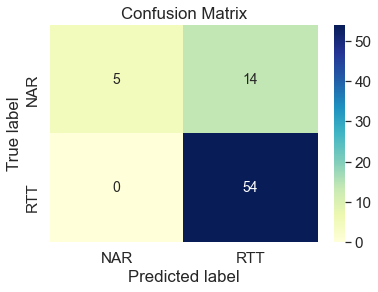

NB, N-Gram Vectors: 
Accuracy on training data 91.10000000000001 %
Accuracy on testing data 80.82000000000001 %
              precision    recall  f1-score   support

           0       1.00      0.26      0.42        19
           1       0.79      1.00      0.89        54

    accuracy                           0.81        73
   macro avg       0.90      0.63      0.65        73
weighted avg       0.85      0.81      0.76        73

**************************************** End of first model ****************************************


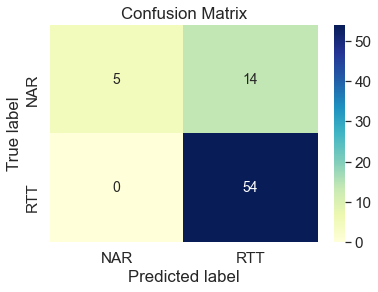

NB, CharLevel Vectors: 
Accuracy on training data 81.51 %
Accuracy on testing data 80.82000000000001 %
              precision    recall  f1-score   support

           0       1.00      0.26      0.42        19
           1       0.79      1.00      0.89        54

    accuracy                           0.81        73
   macro avg       0.90      0.63      0.65        73
weighted avg       0.85      0.81      0.76        73

**************************************** End of first model ****************************************


In [135]:
# Naive Bayes on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
#confusion_matrix = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,"NB_CV.sav")
print("NB, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf,"NB_WL_Tfidf.sav")
print("NB, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram,"NB_NL_Tfidf.sav")
print("NB, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)

# Naive Bayes on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,"NB_CL_Tfidf.sav")
print("NB, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


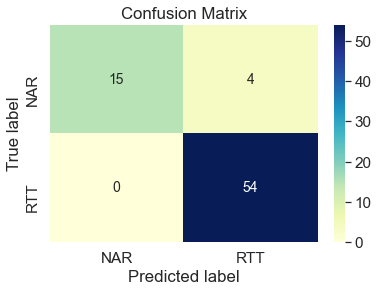

LR, Count Vectors: 
Accuracy on training data 99.66000000000001 %
Accuracy on testing data 94.52000000000001 %
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        19
           1       0.93      1.00      0.96        54

    accuracy                           0.95        73
   macro avg       0.97      0.89      0.92        73
weighted avg       0.95      0.95      0.94        73

**************************************** End of first model ****************************************


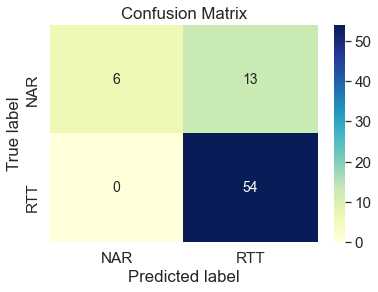

LR, WordLevel TF-IDF: 
Accuracy on training data 86.99 %
Accuracy on testing data 82.19 %
              precision    recall  f1-score   support

           0       1.00      0.32      0.48        19
           1       0.81      1.00      0.89        54

    accuracy                           0.82        73
   macro avg       0.90      0.66      0.69        73
weighted avg       0.86      0.82      0.79        73

**************************************** End of first model ****************************************


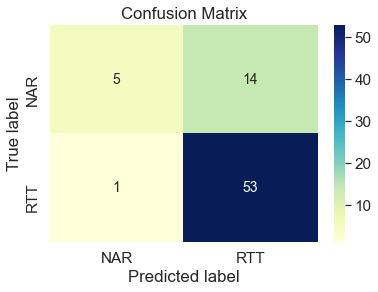

LR, N-Gram Vectors: 
Accuracy on training data 84.25 %
Accuracy on testing data 79.45 %
              precision    recall  f1-score   support

           0       0.83      0.26      0.40        19
           1       0.79      0.98      0.88        54

    accuracy                           0.79        73
   macro avg       0.81      0.62      0.64        73
weighted avg       0.80      0.79      0.75        73

**************************************** End of first model ****************************************


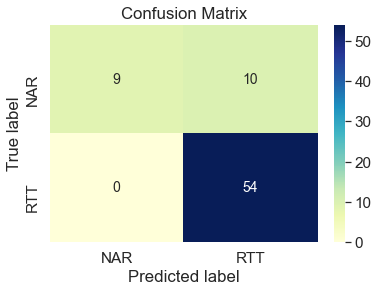

LR, CharLevel Vectors: 
Accuracy on training data 86.3 %
Accuracy on testing data 86.3 %
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        19
           1       0.84      1.00      0.92        54

    accuracy                           0.86        73
   macro avg       0.92      0.74      0.78        73
weighted avg       0.88      0.86      0.84        73

**************************************** End of first model ****************************************


In [136]:
# Linear Classifier on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count, "LG_CV.sav")
print("LR, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf, "LG_WL_Tfidf.sav")
print("LR, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Ngram Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, "LG_NL_Tfidf.sav")
print("LR, N-Gram Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Linear Classifier on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,"LG_CL_Tfidf.sav")
print("LR, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


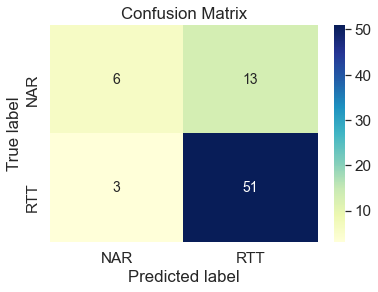

SVM, N-Gram Vectors:
Accuracy on training data 78.08 %
Accuracy on testing data 97.94500000000001 %
              precision    recall  f1-score   support

           0       0.67      0.32      0.43        19
           1       0.80      0.94      0.86        54

    accuracy                           0.78        73
   macro avg       0.73      0.63      0.65        73
weighted avg       0.76      0.78      0.75        73

**************************************** End of first model ****************************************


In [137]:
# SVM on Ngram Level TF IDF Vectors
accuracy_test,accuracy_train,confusion_matrix,classification__ = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, "SVM_NL_Tfidf.sav")
print("SVM, N-Gram Vectors:")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,5)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


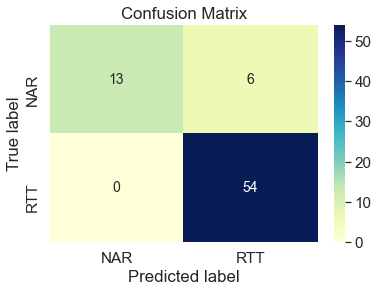

RF, Count Vectors: 
Accuracy on training data 100.0 %
Accuracy on testing data 91.78 %
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        19
           1       0.90      1.00      0.95        54

    accuracy                           0.92        73
   macro avg       0.95      0.84      0.88        73
weighted avg       0.93      0.92      0.91        73

**************************************** End of first model ****************************************


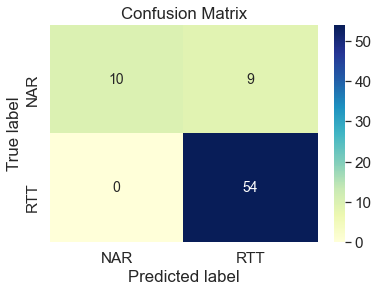

RF, WordLevel TF-IDF: 
Accuracy on training data 100.0 %
Accuracy on testing data 87.67 %
              precision    recall  f1-score   support

           0       1.00      0.53      0.69        19
           1       0.86      1.00      0.92        54

    accuracy                           0.88        73
   macro avg       0.93      0.76      0.81        73
weighted avg       0.89      0.88      0.86        73

**************************************** End of first model ****************************************


In [138]:
# RF on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count,"RF_CV.sav")
print("RF, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# RF on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf, "RF_WL_Tfidf.sav")
print("RF, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,5)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


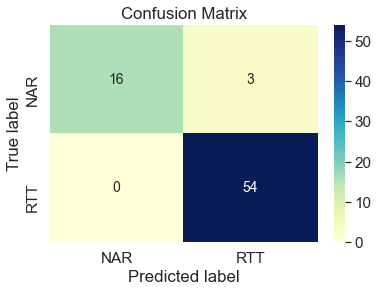

Xgb, Count Vectors: 
Accuracy on training data 99.32 %
Accuracy on testing data 95.89 %
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       0.95      1.00      0.97        54

    accuracy                           0.96        73
   macro avg       0.97      0.92      0.94        73
weighted avg       0.96      0.96      0.96        73

**************************************** End of first model ****************************************


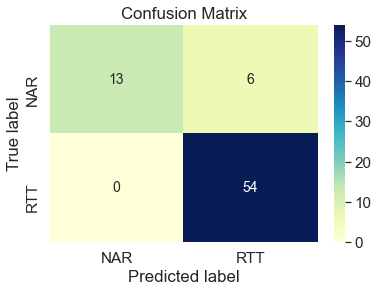

Xgb, WordLevel TF-IDF: 
Accuracy on training data 100.0 %
Accuracy on testing data 91.78 %
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        19
           1       0.90      1.00      0.95        54

    accuracy                           0.92        73
   macro avg       0.95      0.84      0.88        73
weighted avg       0.93      0.92      0.91        73

**************************************** End of first model ****************************************


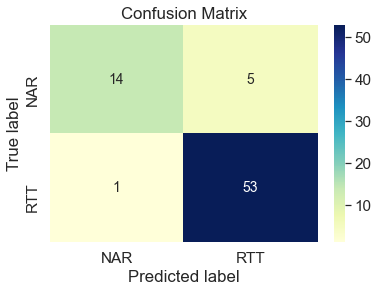

Xgb, CharLevel Vectors: 
Accuracy on training data 100.0 %
Accuracy on testing data 91.78 %
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.91      0.98      0.95        54

    accuracy                           0.92        73
   macro avg       0.92      0.86      0.88        73
weighted avg       0.92      0.92      0.91        73

**************************************** End of first model ****************************************


In [139]:
# Extereme Gradient Boosting on Count Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc(),"XG_CV.sav")
print("Xgb, Count Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc(),"XG_WL_Tfidf.sav")
print("Xgb, WordLevel TF-IDF: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy_train,accuracy_test,confusion_matrix,classification__ = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc(),"XG_CL_Tfidf.sav")
print("Xgb, CharLevel Vectors: ")
print("Accuracy on training data", round(accuracy_train,4)*100,"%")
print("Accuracy on testing data", round(accuracy_test,4)*100,"%")
print(classification__)
print("*"*40,"End of first model","*"*40)


# Stacking Classifier

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import plot_confusion_matrix


m = StackingClassifier(classifiers=[xgboost.XGBClassifier(),ensemble.RandomForestClassifier()],use_probas=True,
                       meta_classifier=svm.SVC())
#,naive_bayes.MultinomialNB()

m.fit(xtrain_tfidf_ngram_chars.tocsc(), train_y)

pred_stck = m.predict(xvalid_tfidf_ngram_chars.tocsc()) #[:,1]

#preds.head()

print(metrics.accuracy_score(valid_y,pred_stck))
print(metrics.accuracy_score(train_y,m.predict(xtrain_tfidf_ngram_chars)))

metrics.confusion_matrix(valid_y,pred_stck)


# Testing

In [ ]:
model = joblib.load('ml_model_pkl/NB_CV.sav')
new_desc = ['''Action needed: Check your Atlassian payment detailsHi Manoj,We couldn't process payment for Bitbucket (centelon) due to a problem with your payment details. We're happy to try again, but we need your help.If your details look correct, please try a different payment method or alternatively contact your bank. Banks sometimes decline payments due to restrictions on international transactions.Update Payment DetailsPlease contact us with any questions, we're always happy to help.
''']
labels = ["AR","NAR"]
nb_count =  count_vect.transform(new_desc)
#nb_count =  tfidf_vect.transform(new_desc)
#nb_count =  tfidf_vect_ngram.transform(new_desc)

#nb_count =  tfidf_vect_ngram_chars.transform(new_desc)
pred = model.predict(nb_count)
print(pred, labels[pred[0]])

# TESTING

In [ ]:
# Testing data from inbox folder- 35 mail classified as AR or NAR
#sample_data = pandas.read_csv(r"C:/Users/mansurya/Desktop/Email_triage/test/testing_data/testing_data_inbox_23_12.csv") #cent_inbox_28_12

# Testing data from inbox folder - All mails first time mails and forward
#sample_data = pandas.read_csv(r"C:/Users/mansurya/Desktop/Email_triage/test/cent_inbox_28_12.csv")

# Testin data from inbox folder - All reply 
#sample_data = pandas.read_csv(r"C:/Users/mansurya/Desktop/Email_triage/test/cen_inbox_ALL_RE_28_12.csv")

# Testin data from inbox/AR folder - Reply 
sample_data = pandas.read_csv(r"C:/Users/mansurya/Desktop/Email_triage/test/testing_data/testing_data_inbox_Reply_28_12.csv")

In [ ]:
sample_data.head()

In [ ]:
sample_data = sample_data.sample(frac=1).reset_index(drop= True)
sample_data.tail(16)

In [ ]:
sample_data.shape

In [ ]:
sample_data.isnull().sum()

In [ ]:
sample_data.dropna(inplace=True)

In [ ]:
sample_data.shape

In [ ]:
sample_data["category"].value_counts()

# Testing on Naive-Bayes + Count Vectorizer

In [ ]:
model = joblib.load('ml_model_pkl/NB_CV.sav')


In [ ]:
#sample_data = pd.read_csv('csv_name.csv')
#labels = ["Activation/Deactiavtion of Credit Card","Credit Card Payment Dispute",
#         "Credit card dispute", "Payment Dispute"]

labels = ["AR","NAR"]
pr_list =[]
count = 0
for i,j in zip(sample_data['category'],sample_data['email']):
    
    pred_n = model.predict(count_vect.transform([j]))
    #pred_n = model.predict(tfidf_vect_ngram_chars.transform([j]))
    print(i, labels[pred_n[0]])
    pr_list.append([j, i, labels[pred_n[0]]])
    if i == labels[pred_n[0]]:
        count+=1
    else:
        continue
print(count)
#pd.DataFrame(pr_list, columns = ['Email', 'Actual','Predicted']).to_csv(r'C:\Users\mansurya\Desktop\Email_triage\test\prediction_output\prediction_inbox_reply_28_12.csv')

# Testing on Naive Bayes + Wordlevel TFidf

In [ ]:
model = joblib.load('ml_model_pkl/NB_WL_Tfidf.sav')
labels = ["AR","NAR"]

#nb_count =  count_vect.transform(new_desc)
#nb_count =  tfidf_vect.transform(new_desc)
#nb_count =  tfidf_vect_ngram.transform(new_desc)

#nb_count =  tfidf_vect_ngram_chars.transform(new_desc)
#pred = model.predict(nb_count)
#print(pred, labels[pred[0]])

In [ ]:
#sample_data = pd.read_csv('csv_name.csv')
#labels = ["Activation/Deactiavtion of Credit Card","Credit Card Payment Dispute",
#         "Credit card dispute", "Payment Dispute"]

labels = ["AR","NAR"]
pr_list =[]
count = 0
for i,j in zip(sample_data['category'],sample_data['email']):
    
    pred_n = model.predict(tfidf_vect.transform([j]))
    #pred_n = model.predict(tfidf_vect_ngram_chars.transform([j]))
    print(i, labels[pred_n[0]])
    pr_list.append([j, i, labels[pred_n[0]]])
    if i == labels[pred_n[0]]:
        count+=1
    else:
        continue
print(count)
#pd.DataFrame(pr_list, columns = ['Email', 'Actual','Predicted']).to_csv(r'C:\Users\mansurya\Desktop\Email_triage\test\prediction_output\prediction_inbox_NB_WL66_30_12.csv')

# Testing on SVM Model

In [ ]:
model = joblib.load('ml_model_pkl/SVM_NL_Tfidf.sav')
labels = ["AR","NAR"]

#nb_count =  count_vect.transform(new_desc)
#nb_count =  tfidf_vect.transform(new_desc)
#nb_count =  tfidf_vect_ngram.transform(new_desc)

#nb_count =  tfidf_vect_ngram_chars.transform(new_desc)
#pred = model.predict(nb_count)
#print(pred, labels[pred[0]])

In [ ]:
#sample_data = pd.read_csv('csv_name.csv')
#labels = ["Activation/Deactiavtion of Credit Card","Credit Card Payment Dispute",
#         "Credit card dispute", "Payment Dispute"]

labels = ["AR","NAR"]
pr_list =[]
count = 0
for i,j in zip(sample_data['category'],sample_data['email']):
    
    pred_n = model.predict(tfidf_vect_ngram.transform([j]))
    #pred_n = model.predict(tfidf_vect_ngram_chars.transform([j]))
    print(i, labels[pred_n[0]])
    pr_list.append([j, i, labels[pred_n[0]]])
    if i == labels[pred_n[0]]:
        count+=1
    else:
        continue
print(count)
#pd.DataFrame(pr_list, columns = ['Email', 'Actual','Predicted']).to_csv(r'C:\Users\mansurya\Desktop\Email_triage\test\prediction_output\prediction_inbox_reply_SVM_29_12.csv')

# Testing on Linear classifier + Char level

In [ ]:
model = joblib.load('ml_model_pkl/LG_CL_Tfidf.sav')
labels = ["AR","NAR"]

#nb_count =  count_vect.transform(new_desc)
#nb_count =  tfidf_vect.transform(new_desc)
#nb_count =  tfidf_vect_ngram.transform(new_desc)

#nb_count =  tfidf_vect_ngram_chars.transform(new_desc)
#pred = model.predict(nb_count)
#print(pred, labels[pred[0]])

In [ ]:
#sample_data = pd.read_csv('csv_name.csv')
#labels = ["Activation/Deactiavtion of Credit Card","Credit Card Payment Dispute",
#         "Credit card dispute", "Payment Dispute"]

labels = ["AR","NAR"]
pr_list =[]
count = 0
for i,j in zip(sample_data['category'],sample_data['email']):
    
    #pred_n = model.predict(tfidf_vect_ngram.transform([j]))
    pred_n = model.predict(tfidf_vect_ngram_chars.transform([j]))
    print(i, labels[pred_n[0]])
    pr_list.append([j, i, labels[pred_n[0]]])
    if i == labels[pred_n[0]]:
        count+=1
    else:
        continue
print(count)
#pd.DataFrame(pr_list, columns = ['Email', 'Actual','Predicted']).to_csv(r'C:\Users\mansurya\Desktop\Email_triage\test\prediction_output\prediction_inbox_reply_linear_29_12.csv')

# Testing on Linear classifier + Word level + TFidf

In [ ]:
model = joblib.load('ml_model_pkl/LG_WL_Tfidf.sav')
labels = ["AR","NAR"]

#1__#nb_count =  count_vect.transform(new_desc)
#2__#nb_count =  tfidf_vect.transform(new_desc)
#3__#nb_count =  tfidf_vect_ngram.transform(new_desc)
#4__#nb_count =  tfidf_vect_ngram_chars.transform(new_desc)


#pred = model.predict(nb_count)
#print(pred, labels[pred[0]])

In [ ]:
#sample_data = pd.read_csv('csv_name.csv')
#labels = ["Activation/Deactiavtion of Credit Card","Credit Card Payment Dispute",
#         "Credit card dispute", "Payment Dispute"]

labels = ["AR","NAR"]
pr_list =[]
count = 0
for i,j in zip(sample_data['category'],sample_data['email']):
    
    #pred_n = model.predict(tfidf_vect_ngram.transform([j]))
    pred_n = model.predict(tfidf_vect.transform([j]))
    print(i, labels[pred_n[0]])
    pr_list.append([j, i, labels[pred_n[0]]])
    if i == labels[pred_n[0]]:
        count+=1
    else:
        continue
print(count)
#pd.DataFrame(pr_list, columns = ['Email', 'Actual','Predicted']).to_csv(r'C:\Users\mansurya\Desktop\Email_triage\test\prediction_output\prediction_inbox_reply_ln_WL_TF_29_12.csv')

# Testing on XGB + Word level + TFidf

In [ ]:
model = joblib.load('ml_model_pkl/XG_CL_Tfidf.sav')
labels = ["AR","NAR"]

#1__#nb_count =  count_vect.transform(new_desc)
#2__#nb_count =  tfidf_vect.transform(new_desc)
#3__#nb_count =  tfidf_vect_ngram.transform(new_desc)
#4__#nb_count =  tfidf_vect_ngram_chars.transform(new_desc)


#pred = model.predict(nb_count)
#print(pred, labels[pred[0]])

In [ ]:
#sample_data = pd.read_csv('csv_name.csv')
#labels = ["Activation/Deactiavtion of Credit Card","Credit Card Payment Dispute",
#         "Credit card dispute", "Payment Dispute"]

labels = ["AR","NAR"]
pr_list =[]
count = 0
for i,j in zip(sample_data['category'],sample_data['email']):
    
    #pred_n = model.predict(tfidf_vect_ngram.transform([j]))
    pred_n = model.predict(tfidf_vect_ngram_chars.transform([j]))
    #pred_n = model.predict(tfidf_vect.transform([j]))
    print(i, labels[pred_n[0]])
    pr_list.append([j, i, labels[pred_n[0]]])
    if i == labels[pred_n[0]]:
        count+=1
    else:
        continue
print(count)
#pd.DataFrame(pr_list, columns = ['Email', 'Actual','Predicted']).to_csv(r'C:\Users\mansurya\Desktop\Email_triage\test\prediction_output\prediction_inbox_reply_ln_WL_TF_29_12.csv')

# Shallow Neural Networks

In [ ]:
# def create_model_architecture(input_size):
#     # create input layer 
#     input_layer = layers.Input((input_size, ), sparse=True)
    
#     # create hidden layer
#     hidden_layer = layers.Dense(100, activation="relu")(input_layer)
    
#     # create output layer
#     output_layer = layers.Dense(1, activation="sigmoid")(hidden_layer)

#     classifier = models.Model(inputs = input_layer, outputs = output_layer)
#     classifier.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
#     return classifier 

# classifier = create_model_architecture(xtrain_tfidf_ngram.shape[1])
# accuracy = train_model(classifier, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, is_neural_net=True)
# print("NN, Ngram Level TF IDF Vectors",  accuracy)

# Convolutional Neural Network

In [ ]:
# def create_cnn():
#     # Add an Input Layer
#     input_layer = layers.Input((70, ))

#     # Add the word embedding Layer
#     embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
#     embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

#     # Add the convolutional Layer
#     conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

#     # Add the pooling Layer
#     pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

#     # Add the output Layers
#     output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
#     output_layer1 = layers.Dropout(0.25)(output_layer1)
#     output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

#     # Compile the model
#     model = models.Model(inputs=input_layer, outputs=output_layer2)
#     model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
#     return model

# classifier = create_cnn()
# accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
# print("CNN, Word Embeddings",  accuracy)

# Recurrent Neural Network – LSTM

In [ ]:
# def create_rnn_lstm():
#     # Add an Input Layer
#     input_layer = layers.Input((70, ))

#     # Add the word embedding Layer
#     embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
#     embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

#     # Add the LSTM Layer
#     lstm_layer = layers.LSTM(100)(embedding_layer)

#     # Add the output Layers
#     output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
#     output_layer1 = layers.Dropout(0.25)(output_layer1)
#     output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

#     # Compile the model
#     model = models.Model(inputs=input_layer, outputs=output_layer2)
#     model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
#     return model

# classifier = create_rnn_lstm()
# accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
# print("RNN-LSTM, Word Embeddings",  accuracy)

# Recurrent Neural Network – GRU

In [ ]:
# def create_rnn_gru():
#     # Add an Input Layer
#     input_layer = layers.Input((70, ))

#     # Add the word embedding Layer
#     embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
#     embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

#     # Add the GRU Layer
#     lstm_layer = layers.GRU(100)(embedding_layer)

#     # Add the output Layers
#     output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
#     output_layer1 = layers.Dropout(0.2)(output_layer1)
#     output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

#     # Compile the model
#     model = models.Model(inputs=input_layer, outputs=output_layer2)
#     model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
#     return model

# classifier = create_rnn_gru()
# accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
# print("RNN-GRU, Word Embeddings",  accuracy)

# Bidirectional RNN

In [ ]:
# def create_bidirectional_rnn():
#     # Add an Input Layer
#     input_layer = layers.Input((70, ))

#     # Add the word embedding Layer
#     embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
#     embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

#     # Add the LSTM Layer
#     lstm_layer = layers.Bidirectional(layers.GRU(100))(embedding_layer)

#     # Add the output Layers
#     output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
#     output_layer1 = layers.Dropout(0.25)(output_layer1)
#     output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

#     # Compile the model
#     model = models.Model(inputs=input_layer, outputs=output_layer2)
#     model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
#     return model

# classifier = create_bidirectional_rnn()
# accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
# print("RNN-Bidirectional, Word Embeddings",  accuracy)

# Recurrent Convolutional Neural Network

In [ ]:
# def create_rcnn():
#     # Add an Input Layer
#     input_layer = layers.Input((70, ))

#     # Add the word embedding Layer
#     embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
#     embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)
    
#     # Add the recurrent layer
#     rnn_layer = layers.Bidirectional(layers.GRU(50, return_sequences=True))(embedding_layer)
    
#     # Add the convolutional Layer
#     conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

#     # Add the pooling Layer
#     pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

#     # Add the output Layers
#     output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
#     output_layer1 = layers.Dropout(0.25)(output_layer1)
#     output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

#     # Compile the model
#     model = models.Model(inputs=input_layer, outputs=output_layer2)
#     model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
#     return model

# classifier = create_rcnn()
# accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
# print("CNN, Word Embeddings",  accuracy)

# Cleaning Data

In [ ]:
# def text_process(text):
#     '''
#     Make text lowercase, remove text in square brackets,remove links,remove special characters
#     and remove words containing numbers.
#     '''
#     text = text.lower()
#     text = sb.clean(text)
#     text = re.sub(r"{{NAME}}", "", text)
#     text = re.sub(r"{{EMAIL}}", "", text)
#     text = re.sub(r"<mailto>", "", text)
#     text = re.sub(r"<{{URL}}>", "", text)
#     text = re.sub(r"{{URL+EMAIL}}", "", text)
#     text = re.sub(r"{{URLNAMENAME}}", "", text)
#     text = re.sub(r"<>", "", text)
#     text = re.sub(r"{{}}", "", text)
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub("\\W"," ",text) # remove special chars
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     #text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     #text = re.sub('\n', '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     text = ''.join(k for k in text if not k in bad_chars)
#     text = [word for word in text.split() if word not in stopwords.words("english")]
#     #text = [ps.stem(word) for word in text.split() if word not in stopwords.words("english")]
#     #text = [word_lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords.words("english")]
#     text = " ".join(text)

#     return text

In [ ]:
    # df_email["email"] = df_email["email"].apply(text_process)

In [ ]:
# df_email.reset_index(inplace = True,drop = True)

In [ ]:
# df_email.tail(10)

In [ ]:
# df_email.shape

In [ ]:
# tokenized_email = df_email['email'].apply(lambda x: x.split())
# tokenized_email.tail()

In [ ]:
# word_lemmatizer = WordNetLemmatizer()

# tokenized_email = tokenized_email.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
# tokenized_email.tail()

In [ ]:
# len(tokenized_email)

In [ ]:
# for i, tokens in enumerate(tokenized_email):
#     tokenized_email[i] = " ".join(tokens)
#     print(i," ".join(tokens))

# #df_email['lematized_email'] = tokenized_email
# #df_email.head(10)

In [ ]:

# df_email['lematized_email'] = tokenized_email
# df_email.tail(10)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df_email['category']=le.fit_transform(df_email['category'])

In [ ]:
# df_email.tail(10)

# AR - 0
# NAR - 1

In [ ]:
# X = df_email["lematized_email"]
# y = df_email["category"]

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.1)


In [ ]:
# X_train = X_train.values.tolist()
# X_test  = X_test.values.tolist()
# y_train = np.array(y_train)
# y_test  = np.array(y_test)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# text_clf = Pipeline([('vect', CountVectorizer()),
#                      ('tfidf', TfidfTransformer()),
#                      ('clf', SVC()),
#                      ])

In [ ]:
# from sklearn import metrics
# text_clf.fit(list(X_train), list(y_train))
# predicted = text_clf.predict(list(X_test))
# print(metrics.classification_report(list(y_test), predicted))

# Countvectorizer

In [ ]:
# cv = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
# X_train = cv.fit_transform(X_train)
# X_test = cv.transform(X_test)

# TFIDF Matrix

In [ ]:

# Tfidf_vect  = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=1200)

# tfidf_model = Tfidf_vect.fit(df_email["lematized_email"])

# X_train = Tfidf_vect.transform(X_train)
# X_test = Tfidf_vect.transform(X_test)



In [ ]:
# print(X_train.shape)

In [ ]:
# SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
# model=SVM.fit(X_train_Tfidf,y_train)
# # # predict the labels on validation dataset
# predictions_SVM = SVM.predict(X_test_Tfidf)
# # # Use accuracy_score function to get the accuracy
# print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

# Model Building

# Logistic Regression

In [ ]:
# LGM = LogisticRegression()
# LGM.fit(X_train, y_train)

# # Prediction on test data
# pred_LGM = LGM.predict(X_test)

# # Building confusion matrix using test data and predictions
# CF_LGM = confusion_matrix(y_test,pred_LGM)
# print("CONFUSION MATRIX","\n",CF_LGM)

# print("*"*60)

# # Fianl results with accuracy, precision and recall
# CL_LGM = classification_report(y_test,pred_LGM)
# print(CL_LGM)


# NAIVE BAYES

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# nb = MultinomialNB(alpha=.01)
# nb.fit(X_train, y_train)

# # Prediction on test data
# pred = nb.predict(X_test)

# # Building confusion matrix using test data and predictions
# cf = confusion_matrix(y_test,pred)
# print("CONFUSION MATRIX","\n",cf)

# print("*"*60)

# # Fianl results with accuracy, precision and recall
# cl = classification_report(y_test,pred)
# print(cl)


# Testing 

In [ ]:
# email = """Dear Srividya,

# Please find attached herewith the PF Challan of centelon for Nov 2020 for your review. If you find the same in order then please transfer Rs 266376/- for making payment of the same.

# Also attached herewith is the invoice for this month, request you to release payment against the same.
# """
# print(nb.predict(cv.transform([email]))[0])

In [ ]:
# email = """Hi Team,

# To keep you posted, we are launching a paid LinkedIn campaign for a  “web launch” post.
# Respective amount would get debited from the card, details are as below-

# •	Date: 15th to 20th September (6days)
# •	Spends per day: 500 INR ( total amount- 3000 INR , it may exceed a little as per the LinkedIn algorithm)
# •	Campaign for : India


# Please let us know, in case of any query.
# """

# print(nb.predict(cv.transform([email]))[0])

# SVM 

In [ ]:
SVM = SVC()
SVM.fit(X_train, y_train)

# Prediction on test data
pred = SVM.predict(X_test)

# Building confusion matrix using test data and predictions
CF_SVM = confusion_matrix(y_test,pred)
print("CONFUSION MATRIX","\n",CF_SVM)

print("*"*60)

# Fianl results with accuracy, precision and recall
CL_SVM = classification_report(y_test,pred)
print(CL_SVM)


# XGBoost Classifier

In [ ]:
# import xgboost

# XGB = xgboost.XGBClassifier()
# XGB.fit(X_train, y_train)

# # Prediction on test data
# pred_XGB = XGB.predict(X_test)

# # Building confusion matrix using test data and predictions
# CF_XGB = confusion_matrix(y_test,pred_XGB)
# print("CONFUSION MATRIX","\n",CF_XGB)

# print("*"*60)

# # Fianl results with accuracy, precision and recall
# CL_XGB = classification_report(y_test,pred_XGB)
# print(CL_XGB)



In [ ]:
# # Hyper parameter tunning for XGBoost

# params={
#  "learning_rate"    : [0.01,0.03,0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#  "max_depth"        : [ 1,3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,0.5,0.6,0.7,1.0 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
# }

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# XGB_classifier = xgboost.XGBClassifier()

In [ ]:
# random_search = RandomizedSearchCV(XGB_classifier,param_distributions=params,
#                                   n_iter=5,scoring="roc_auc",
#                                   n_jobs=-1,
#                                   cv=5,
#                                   verbose=3)

In [ ]:
# random_search.fit(X_train,y_train)

In [ ]:
# random_search.best_estimator_

In [ ]:
# random_search.best_params_

In [ ]:
# # Model with hyper parameter tunning

# XGB_HP = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
#               importance_type='gain', interaction_constraints='',
#               learning_rate=0.3, max_delta_step=0, max_depth=10,
#               min_child_weight=1, monotone_constraints='()',
#               n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
#               tree_method='exact', validate_parameters=1, verbosity=None)
# XGB_HP.fit(X_train, y_train)

# # Prediction on test data
# pred_XGB_HP = XGB_HP.predict(X_test)

# # Building confusion matrix using test data and predictions
# CF_XGB_HP = confusion_matrix(y_test,pred_XGB_HP)
# print("CONFUSION MATRIX","\n",CF_XGB_HP)

# print("*"*60)

# # Fianl results with accuracy, precision and recall
# CL_XGB_HP = classification_report(y_test,pred_XGB_HP)
# print(CL_XGB_HP)



In [ ]:

# from sklearn.model_selection import cross_val_score
# score = cross_val_score(XGB_HP,X_train,y_train,cv=10)
# print(score)

In [ ]:

# print(score.mean())